<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

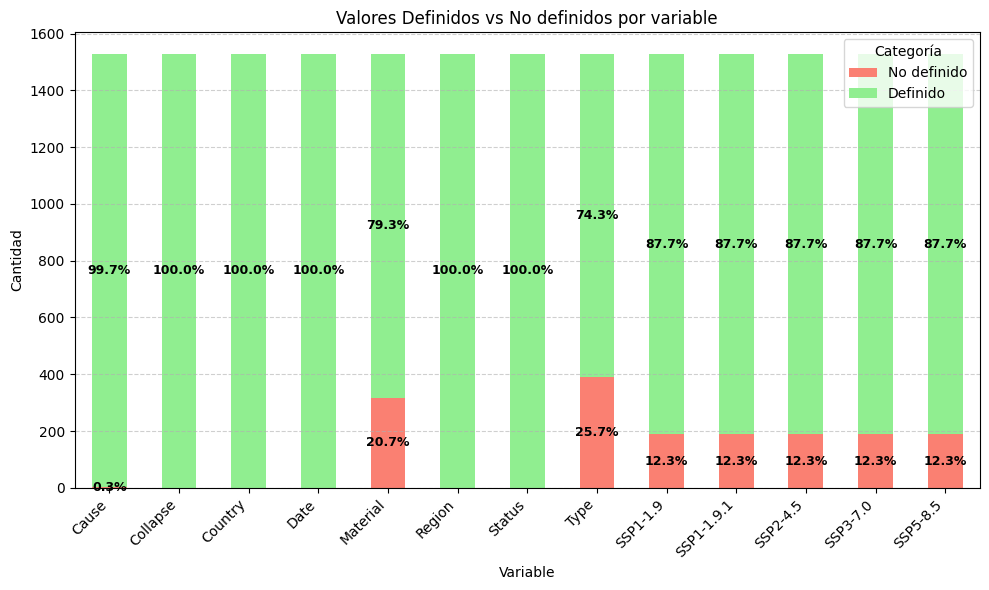

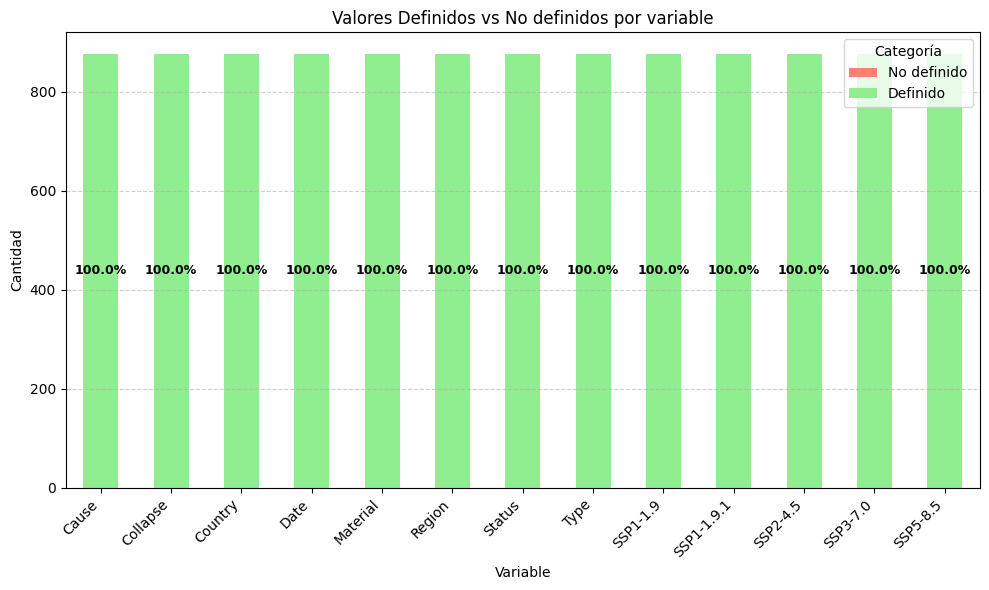

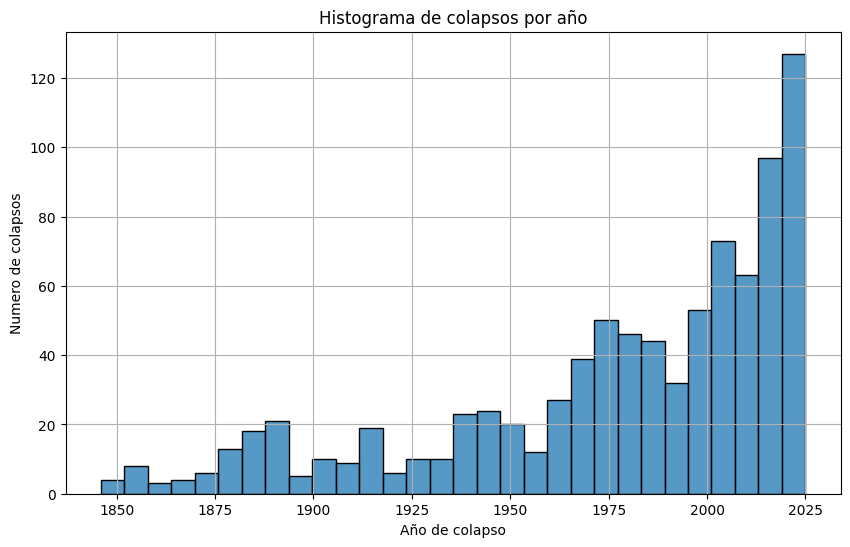

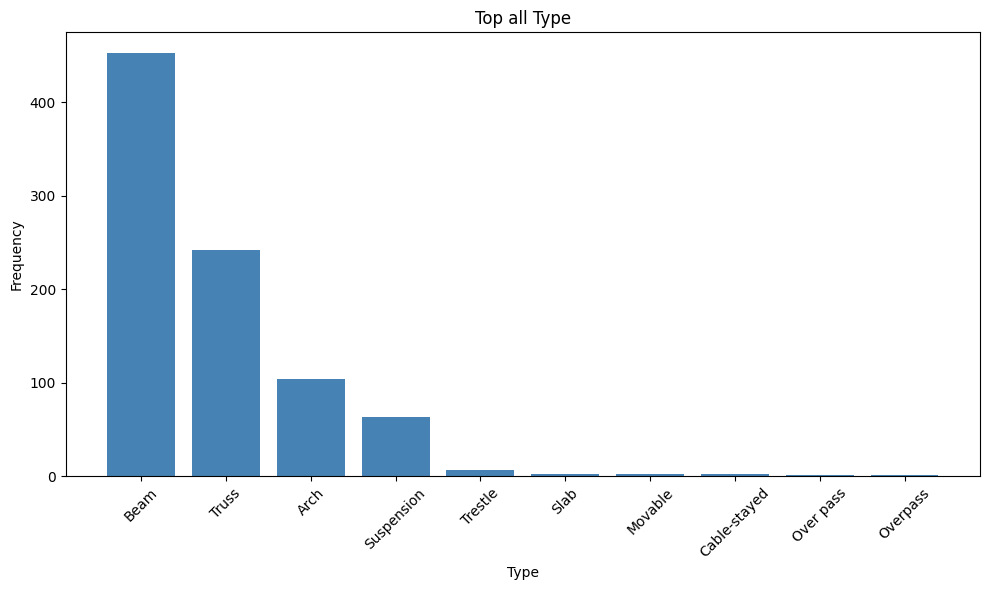

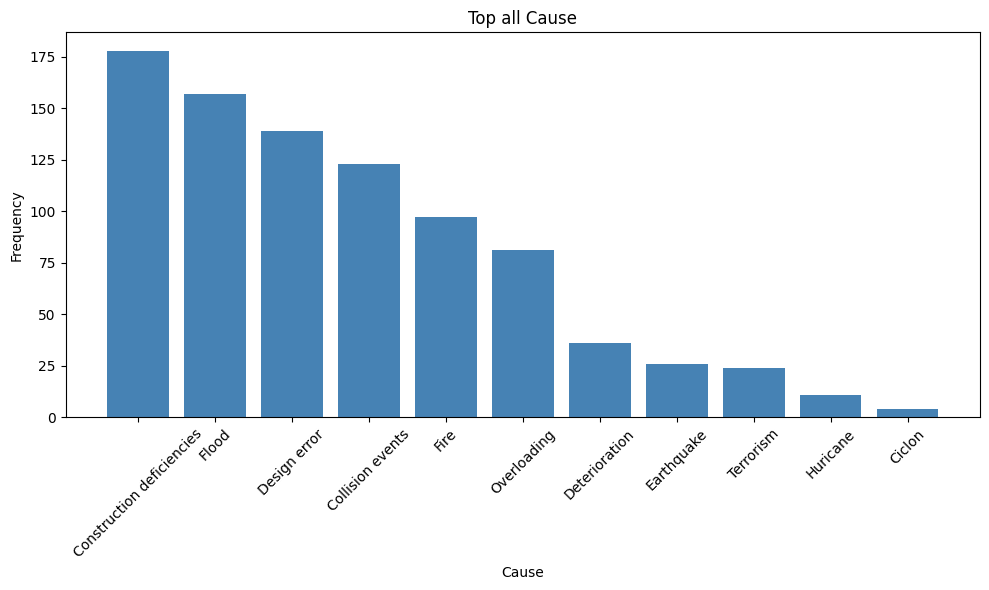

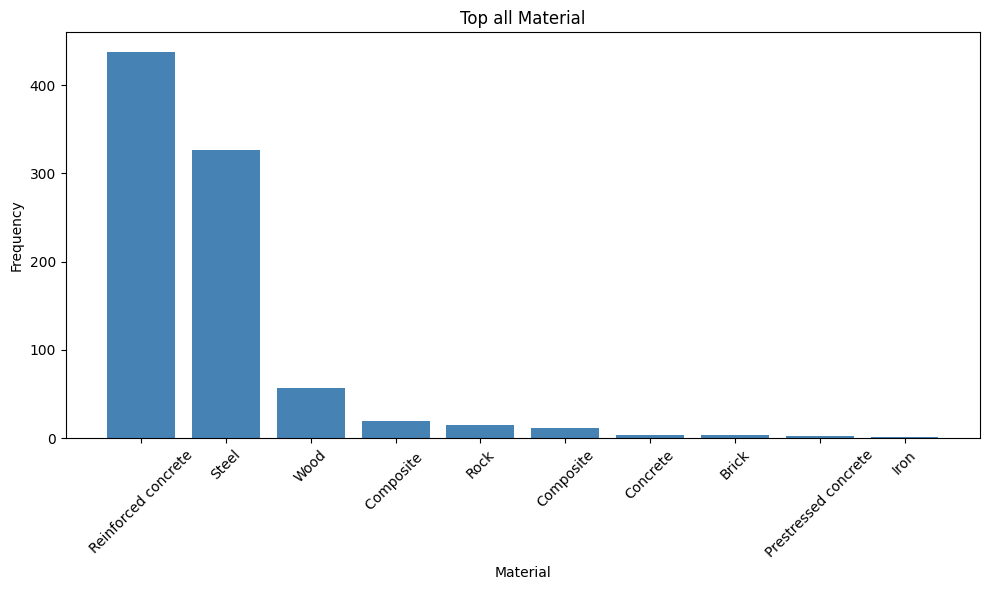

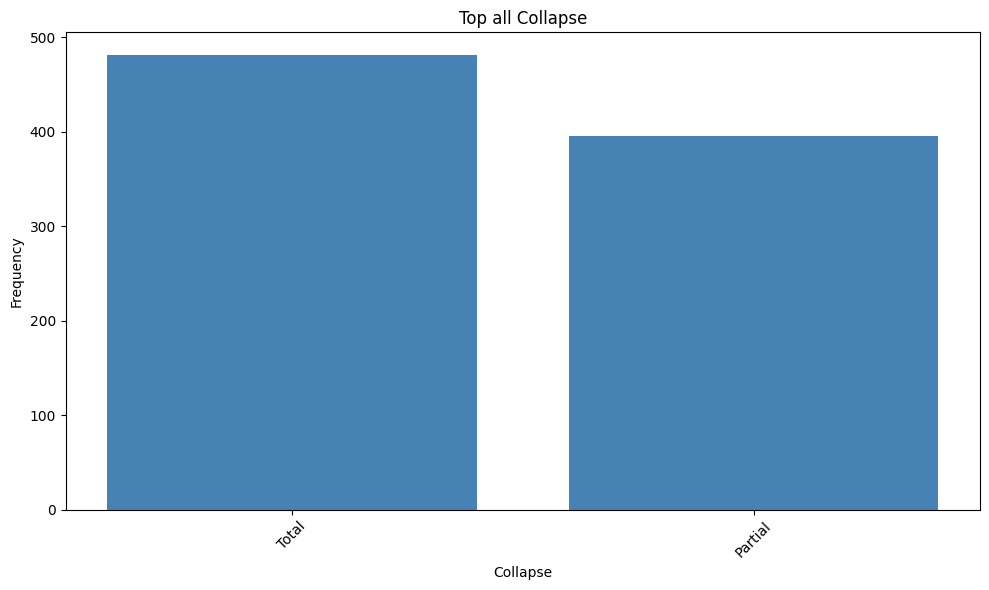

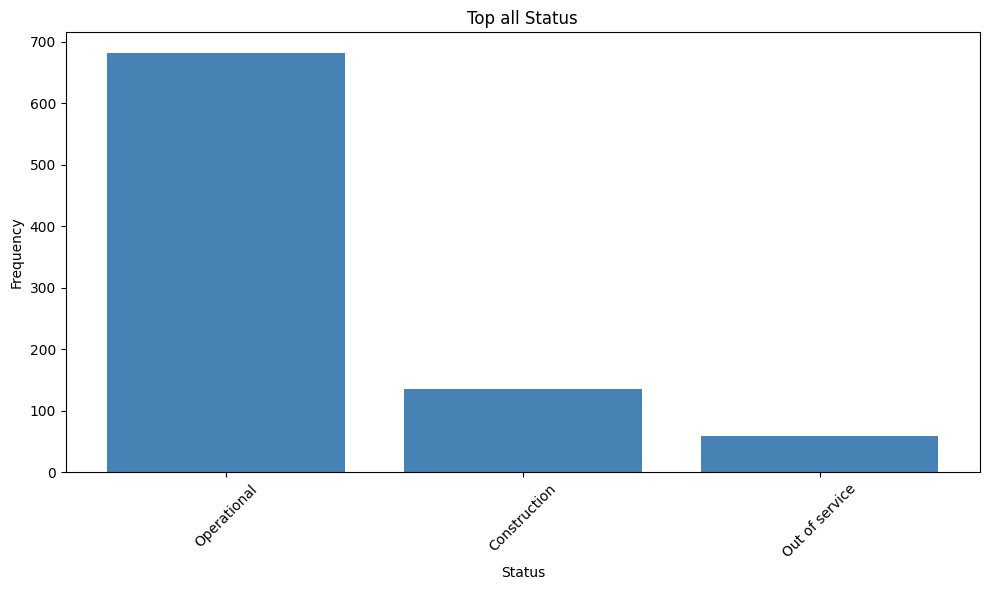

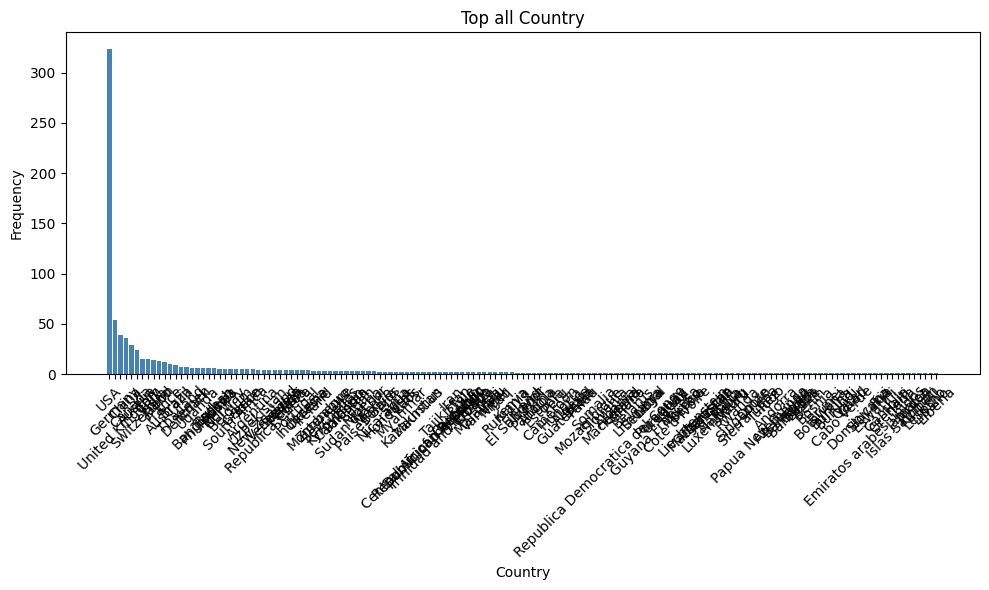

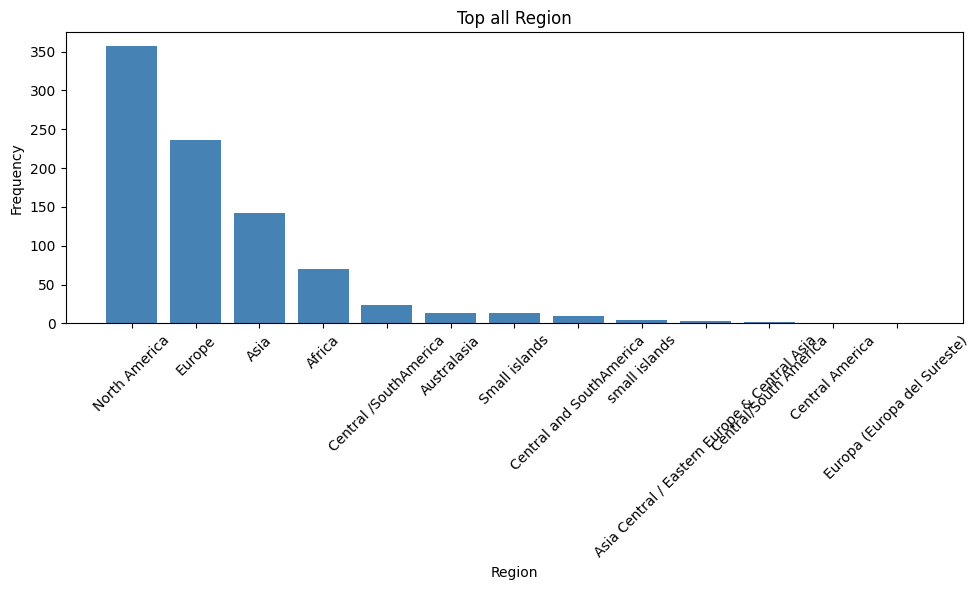

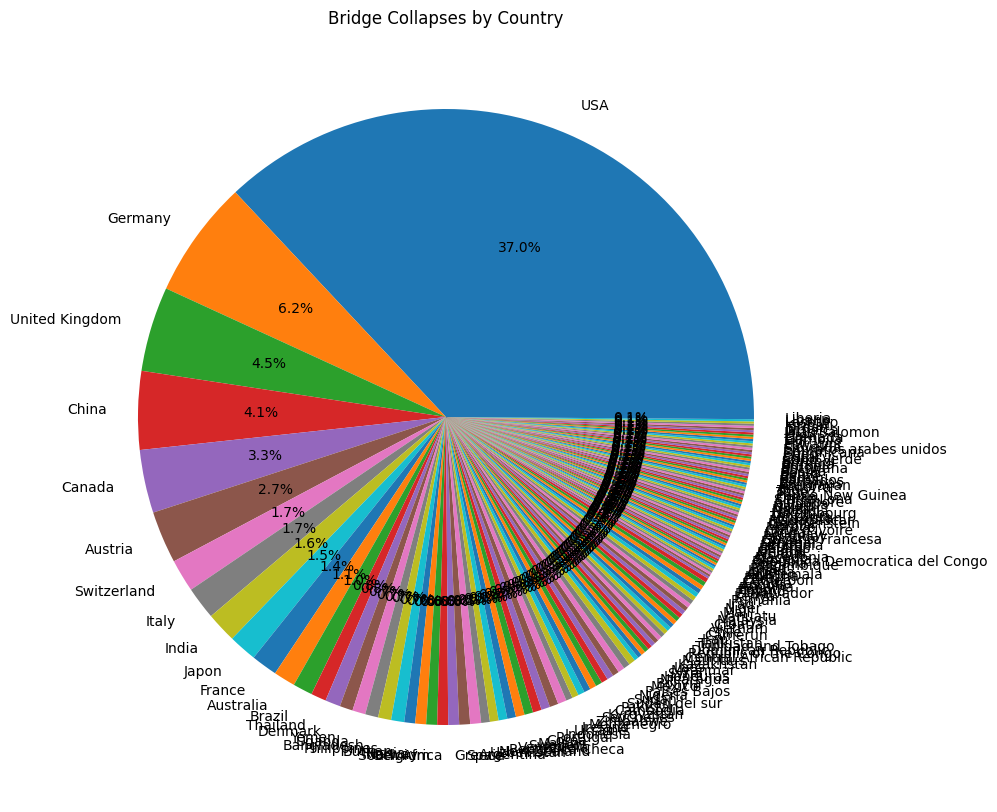

Count de X Type                 872
Cause                872
Material             872
Collapse             872
Status               872
Country              872
Region               872
Date                 872
temperature_1.9      872
temperature_1.9.1    872
temperature_4.5      872
temperature_7.0      872
temperature_8.5      872
dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %% [markdown]
# # Frecuencias
# 

# %%
df=X

# %%
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


# %%
def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    plt.bar(values.index, values.values, color='steelblue')
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# %%
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


# %%

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# %% [markdown]
# # Eliminacion de Outliers

# %%

temp_df=X

## Eliminacion de Causes que tienen pocos valores

X = X[
    (X['Cause'] != "Ciclon") 
]
temp_df=X


print("Count de X "+str(X.count()))

Y=X['Cause'].copy()

cat_cols.remove("Cause")
X=X.drop(columns=['Cause'])


In [2]:
temp_df

Type                      Cause             Material Collapse  \
0          Truss                  Terrorism                Steel    Total   
1        Trestle                  Terrorism           Composite     Total   
2           Beam                  Terrorism  Reinforced concrete    Total   
23    Suspension                  Terrorism  Reinforced concrete    Total   
34    Suspension                  Terrorism                 Rock    Total   
...          ...                        ...                  ...      ...   
1531        Beam                Overloading  Reinforced concrete    Total   
1532        Beam  Construction deficiencies  Reinforced concrete    Total   
1534        Beam                      Flood            Composite  Partial   
1535        Beam                  Terrorism  Reinforced concrete  Partial   
1536        Beam                      Flood  Reinforced concrete    Total   

            Status      Country                 Region    Date  \
0      Operational      Germany                 Europe  1945.0   
1      Operational       Canada          North America  2012.0   
2      Operational       Canada          North America  2024.0   
23     Operational  El Salvador  Central /SouthAmerica  1984.0   
34     Operational       Russia                 Europe  1905.0   
...            ...          ...                    ...     ...   
1531   Operational      Jamaica          Small islands  2024.0   
1532  Construction       Jordan                   Asia  2003.0   
1534   Operational      Lesotho                 Africa  2020.0   
1535   Operational       Libano                   Asia  2006.0   
1536   Operational      Liberia                 Africa  2025.0   

      temperature_1.9  temperature_1.9.1  temperature_4.5  temperature_7.0  \
0            -0.27856          -0.021440         -0.02468         0.082760   
1             1.58241           1.726760          1.92925         1.756970   
2             2.58803           2.722245          3.03332         2.274200   
23            0.21845           0.167995          0.11754         0.167995   
34           -0.10731          -0.244030         -0.15941        -0.386810   
...               ...                ...              ...              ...   
1531          2.58803           1.154960          1.20863         1.043770   
1532          1.06424           0.899050          1.01453         1.045700   
1534          1.67965           1.289420          1.18791         1.369190   
1535          0.97806           1.246685          1.38773         1.246685   
1536          1.57352           1.523960          1.32506         1.351885   

      temperature_8.5  
0           -0.024680  
1            1.971835  
2            2.578360  
23           0.114890  
34          -0.328650  
...               ...  
1531         1.130410  
1532         1.014530  
1534         1.309620  
1535         1.270530  
1536         1.603140  

[872 rows x 13 columns]

# NO  STATUS REGION SUBREGION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   N°                 1538 non-null   int64 
 1   Date               1538 non-null   object
 2   Name               1538 non-null   object
 3   Type               1538 non-null   object
 4   Cause              1538 non-null   object
 5   Material           1538 non-null   object
 6   Collapse           1538 non-null   object
 7   Status             1538 non-null   object
 8   Country            1538 non-null   object
 9   Region             1538 non-null   object
 10  Sub-region         1538 non-null   object
 11  temperature_1.9    1528 non-null   object
 12  temperature_1.9.1  1528 non-null   object
 13  temperature_4.5    1528 non-null   object
 14  temperature_7.0    1528 non-null   object
 15  temperature_8.5    1528 non-null   object
dtypes: int64(1), object(15)
memory usage: 192.

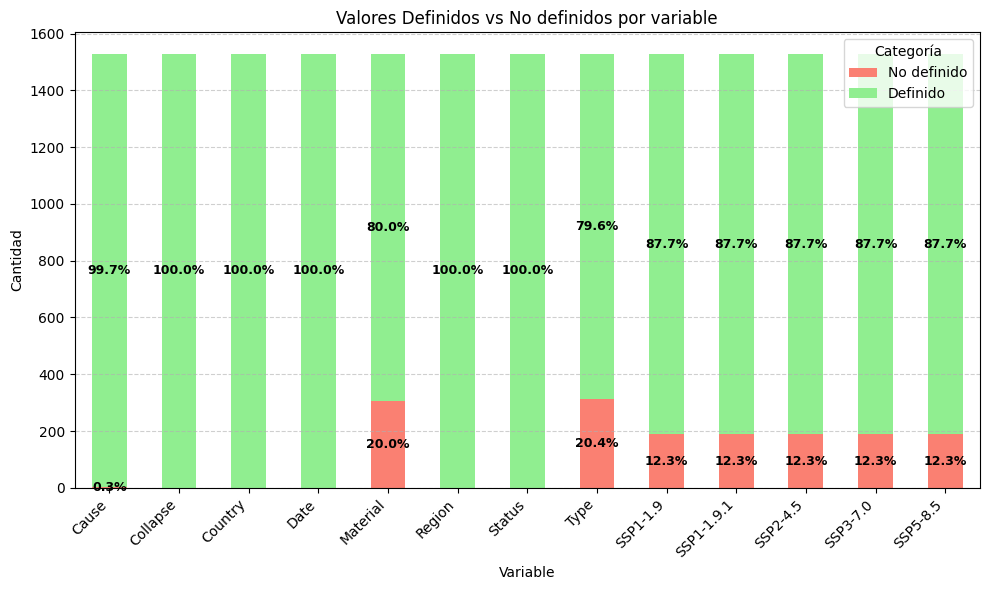

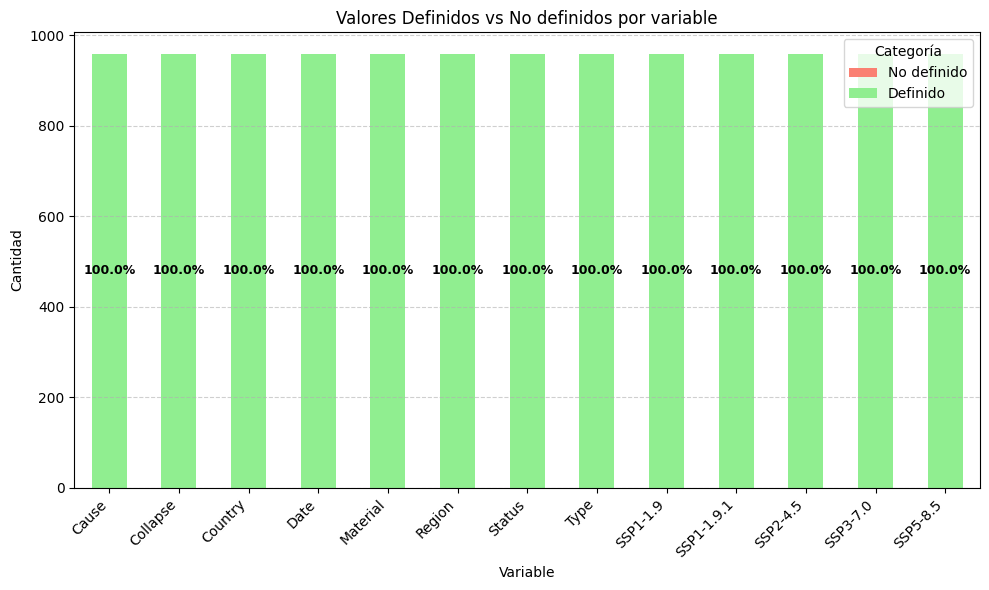

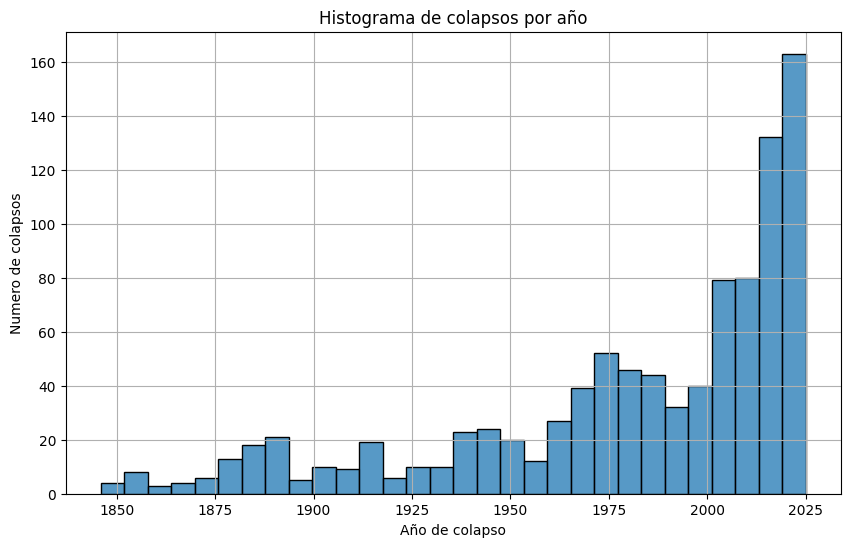

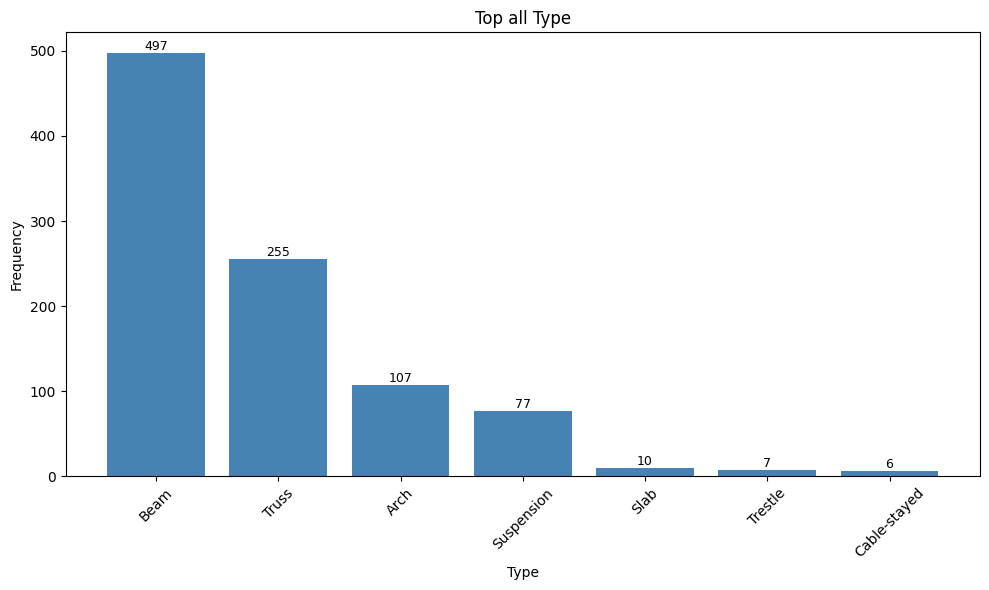

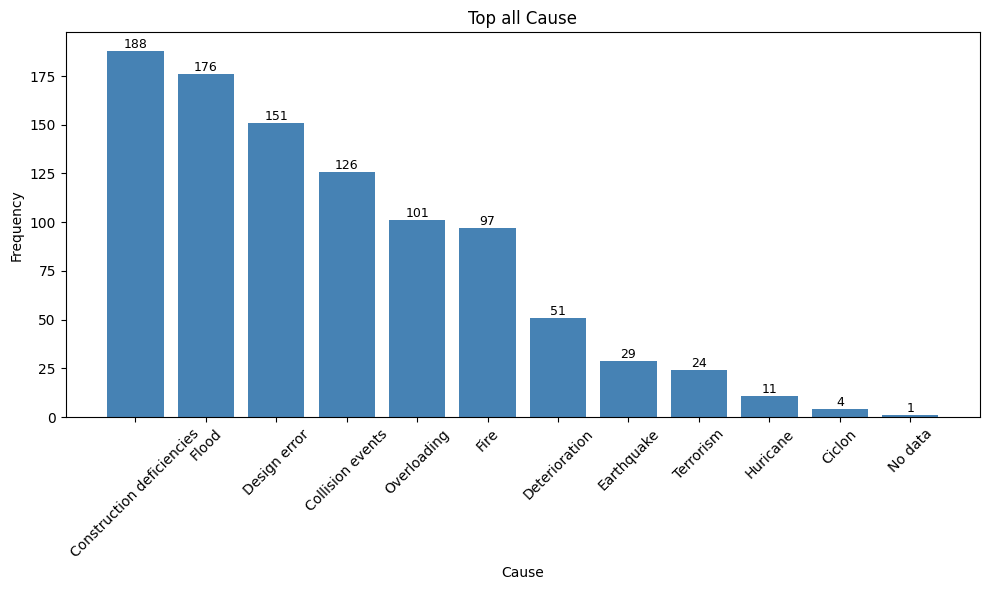

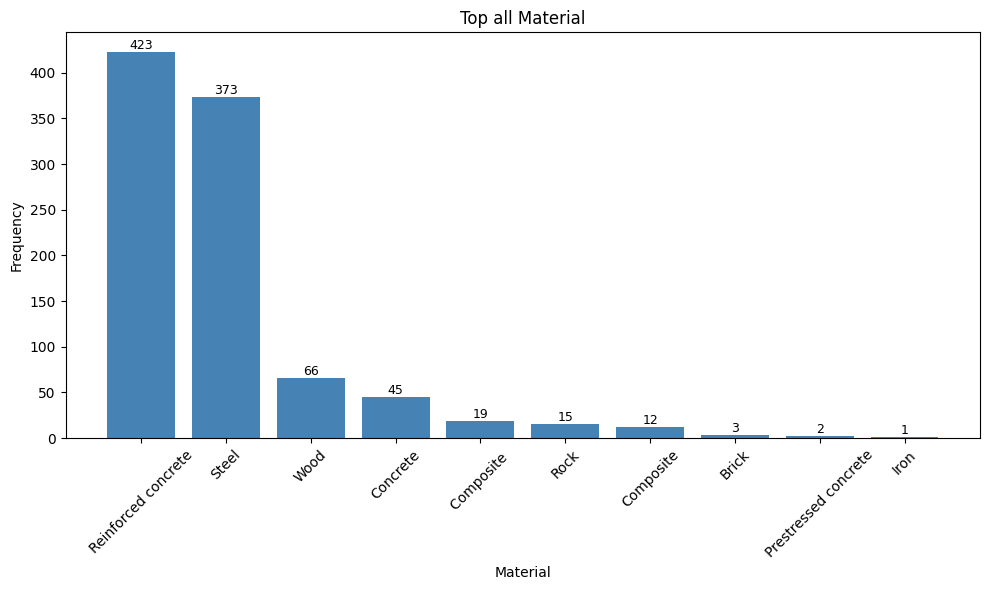

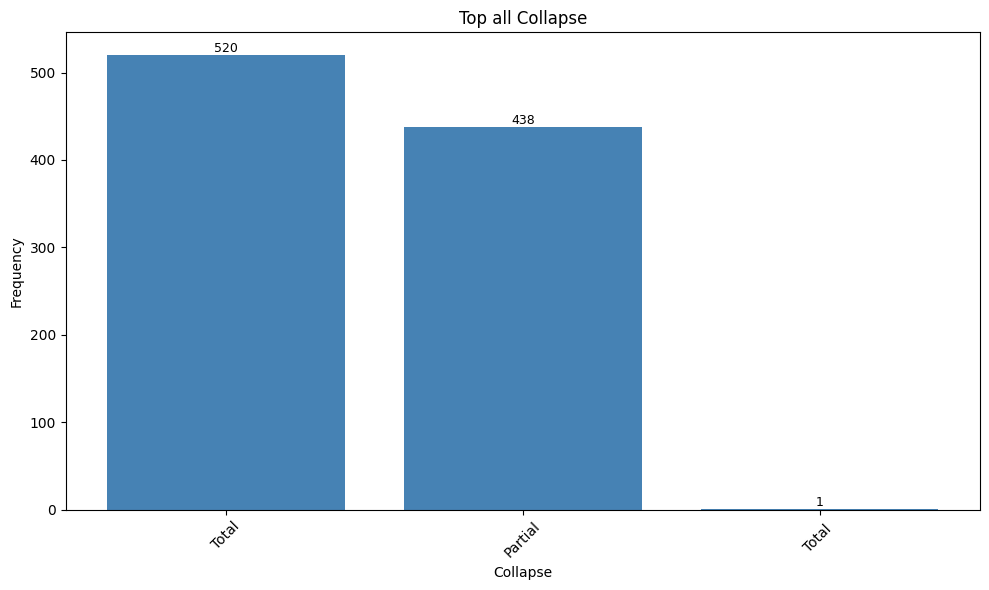

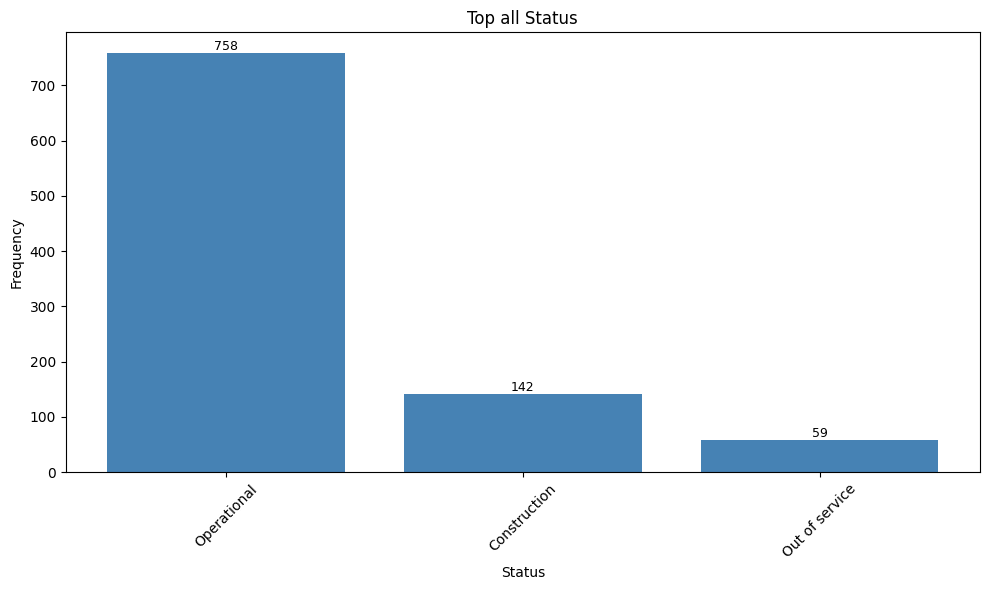

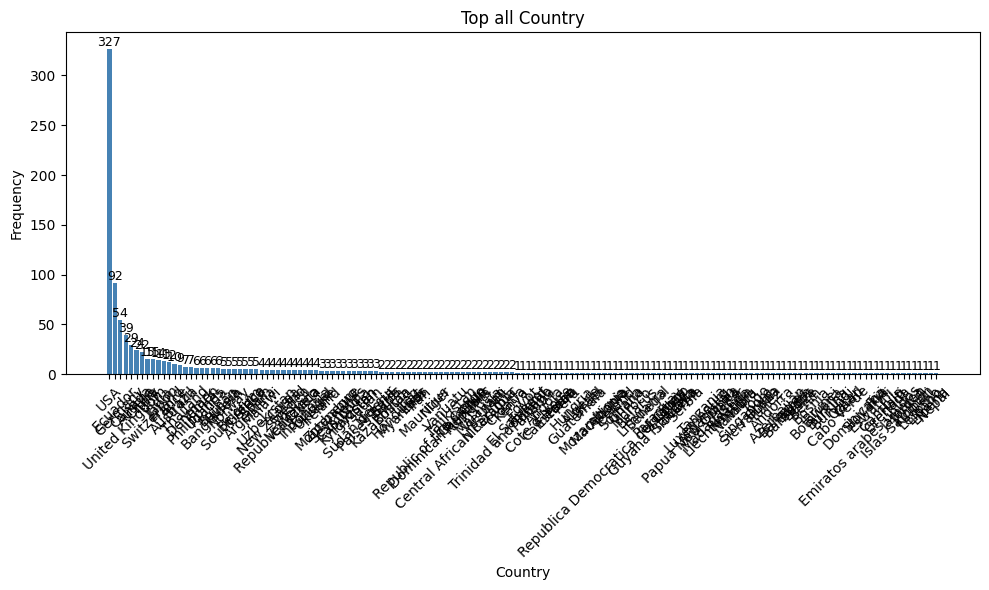

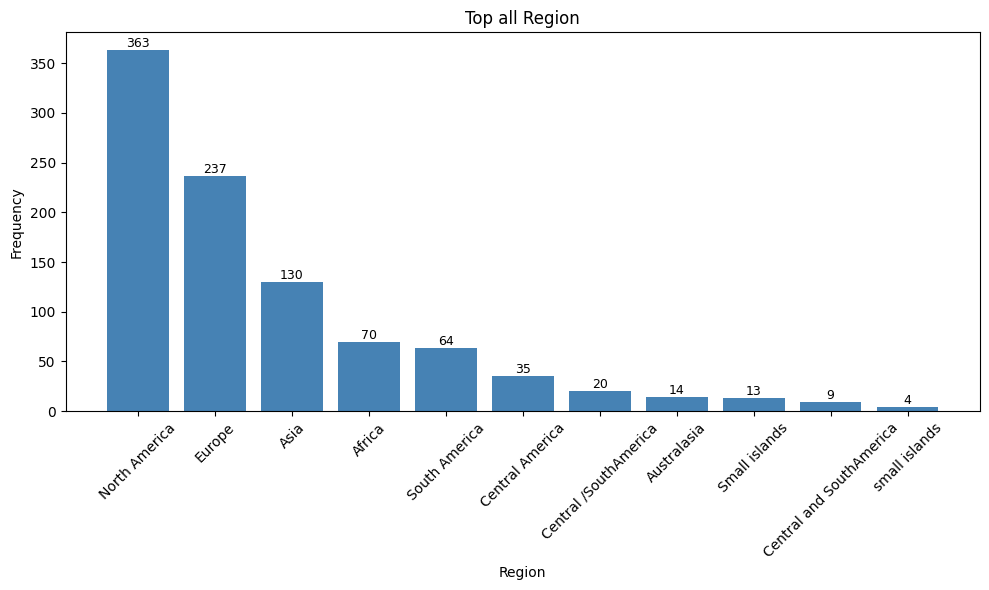

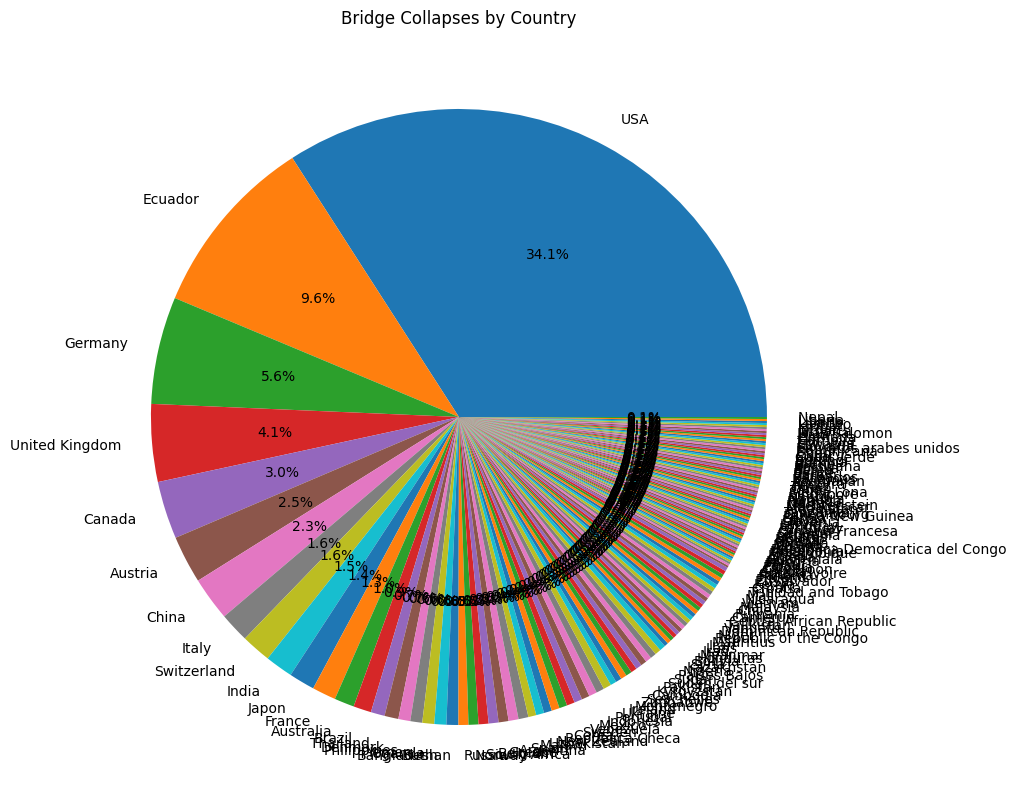

Count de X Type                 840
Cause                840
Material             840
Collapse             840
Status               840
Country              840
Region               840
Date                 840
temperature_1.9      840
temperature_1.9.1    840
temperature_4.5      840
temperature_7.0      824
temperature_8.5      840
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 41 to 1537
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               840 non-null    object 
 1   Cause              840 non-null    object 
 2   Material           840 non-null    object 
 3   Collapse           840 non-null    object 
 4   Status             840 non-null    object 
 5   Country            840 non-null    object 
 6   Region             840 non-null    object 
 7   Date               840 non-null    int32  
 8   temperature_1.9    840 non-null    float64
 9   temperature_1.9.

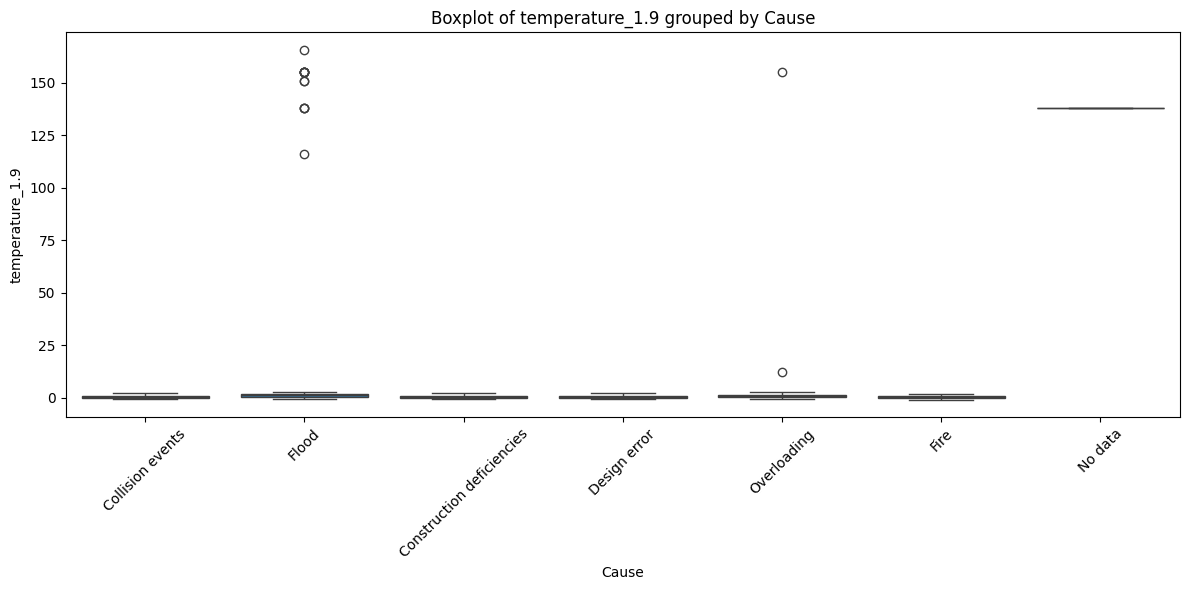

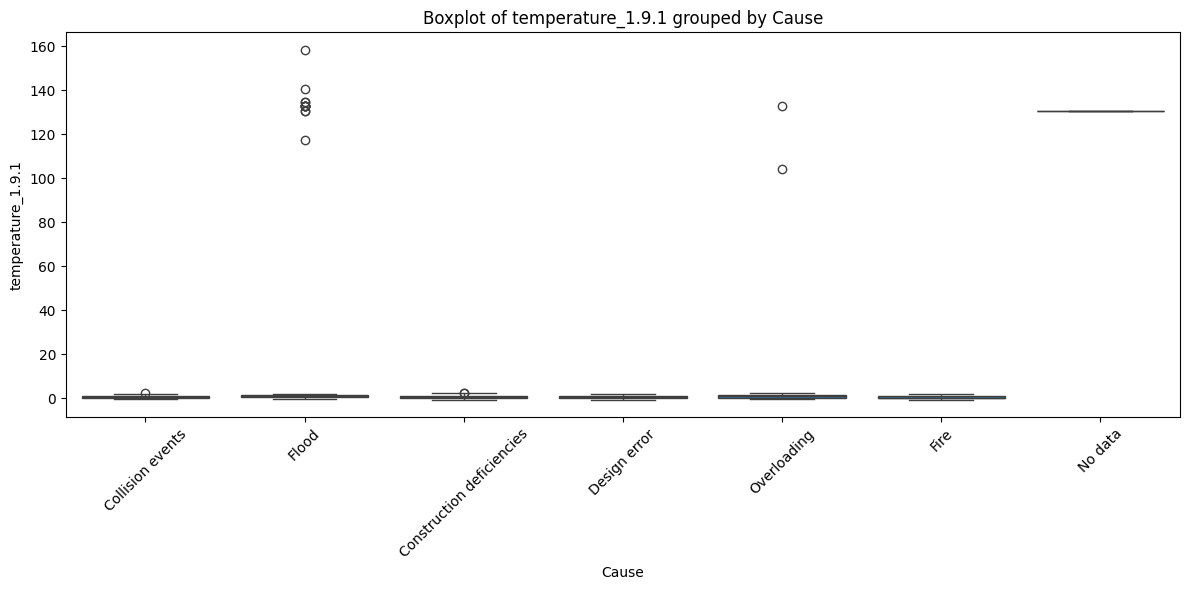

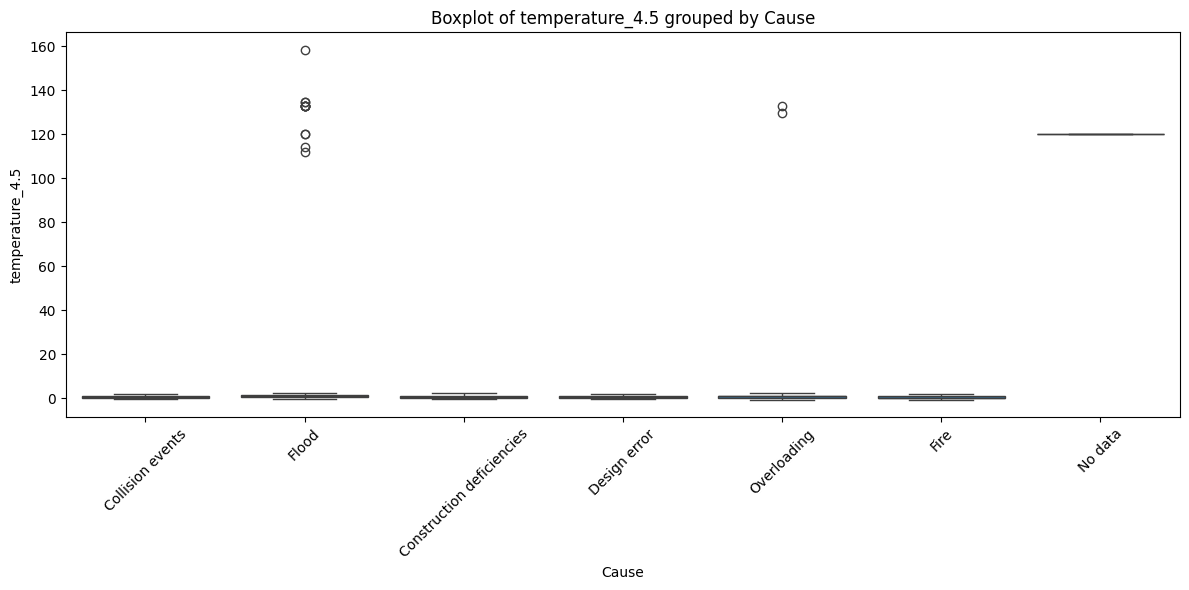

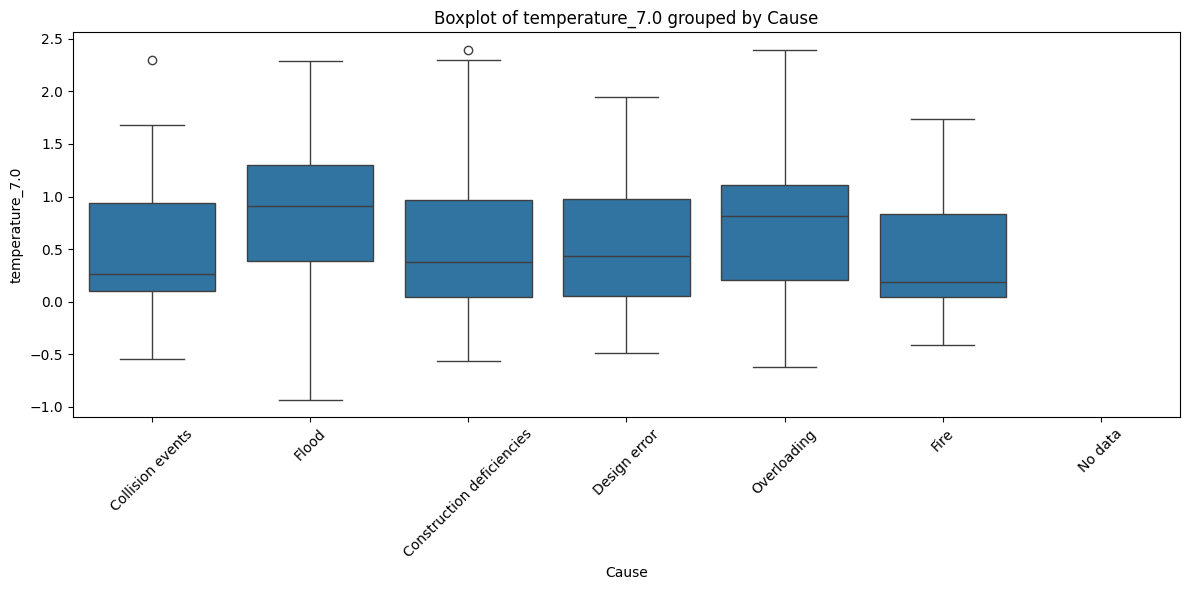

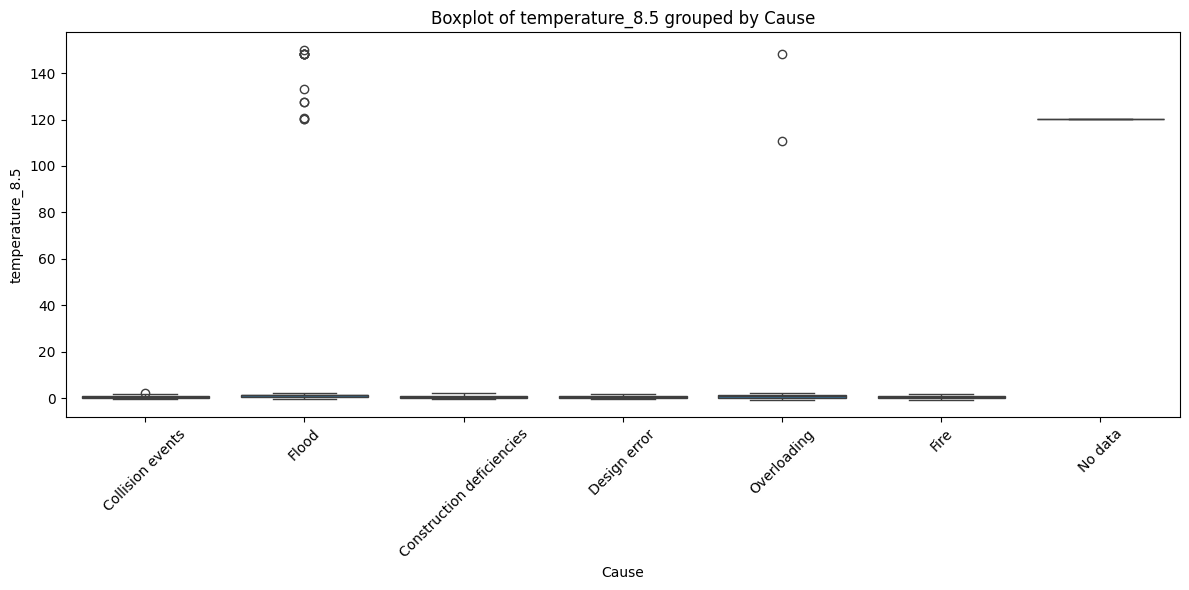

Removing 16 rows identified as outliers.


In [3]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# %%
import pandas as pd

#df2 = pd.read_csv(r'E:\Tesis\Data\raw3.csv', delimiter=';', engine='python')
df2 = pd.read_csv(r'E:\Tesis\Data\raw4.csv', encoding='latin-1')
df2


# %%
df2.rename(columns={
    "SSP1-1.9": "temperature_1.9",
    "SSP1-1.9.1": "temperature_1.9.1",  
    "SSP2-4.5": "temperature_4.5",
    "SSP3-7.0": "temperature_7.0",
    "SSP5-8.5": "temperature_8.5"
}, inplace=True)

# %%
df2.info()

# %%
def compare_not_defined_frequency(df, column_name):
    is_not_defined = df[column_name] == "Not defined"
    
    counts = {
        "Not defined": is_not_defined.sum(),
        "Defined": (~is_not_defined).sum()
    }

    count_series = pd.Series(counts)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=count_series.index, y=count_series.values, palette="pastel")
    plt.title(f"'Not defined' vs Defined values in '{column_name}'")
    plt.ylabel("Count")
    plt.xlabel("Category")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# %%
import pandas as pd
import matplotlib.pyplot as plt

def stacked_not_defined_comparison(df, columns_to_check):
    # Etiquetas legibles para las temperaturas
    pretty_labels = {
        "temperature_1.9": "SSP1-1.9",
        "temperature_1.9.1": "SSP1-1.9.1",
        "temperature_4.5": "SSP2-4.5",
        "temperature_7.0": "SSP3-7.0",
        "temperature_8.5": "SSP5-8.5",
    }

    data = {
        "Variable": [],
        "Category": [],
        "Count": []
    }

    for col in columns_to_check:
        col_series = df[col]
        
        if pd.api.types.is_numeric_dtype(col_series):
            not_defined_count = col_series.isna().sum()
        else:
            col_series = col_series.astype(str).str.strip()
            not_defined_count = col_series.isin(["Not defined", "No definido", "#N/A", "ER"]).sum() + col_series.isna().sum()

        defined_count = df.shape[0] - not_defined_count

        data["Variable"].extend([col, col])
        data["Category"].extend(["No definido", "Definido"])
        data["Count"].extend([not_defined_count, defined_count])

    plot_df = pd.DataFrame(data)

    pivot_df = plot_df.pivot(index="Variable", columns="Category", values="Count").fillna(0)

    for cat in ["No definido", "Definido"]:
        if cat not in pivot_df.columns:
            pivot_df[cat] = 0
    pivot_df = pivot_df[["No definido", "Definido"]]

    # Cambiar nombres por etiquetas legibles
    pivot_df = pivot_df.rename(index=pretty_labels)

    # Graficar
    ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["salmon", "lightgreen"])
    plt.title("Valores Definidos vs No definidos por variable")
    plt.ylabel("Cantidad")
    plt.xlabel("Variable")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Categoría")
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)

    for i, variable in enumerate(pivot_df.index):
        total = pivot_df.loc[variable].sum()
        y_offset = 0
        for category in pivot_df.columns:
            value = pivot_df.loc[variable, category]
            if value > 0:
                percent = (value / total) * 100
                ax.text(i, y_offset + value / 2, f"{percent:.1f}%", ha='center', va='center',
                        fontsize=9, color='black', fontweight='bold')
                y_offset += value

    plt.tight_layout()
    plt.show()


# %%
cat_cols=['Type','Cause','Material','Collapse','Status','Country','Region']

num_cols = [
    'Date',
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]



df2=df2.dropna()
df2=df2.drop(columns=['Name','Sub-region'])

target=['Cause']

features=cat_cols+num_cols
X=df2[features].copy()


stacked_not_defined_comparison(X, features)


# %%
X = X[
    (X['Type'] != "Not defined") &
    (X['Material'] != "Not defined") &
    (X['Cause'] != "No definido") &
    (X['Date'] != 'No date') &
    (X['Date'] != 'no date') &
    (X['temperature_1.9'] != "ER") &
    (X['temperature_1.9'] != "#N/A") &
    (X['temperature_1.9.1'] != "ER") &
    (X['temperature_1.9.1'] != "#N/A") &
    (X['temperature_4.5'] != "ER") &
    (X['temperature_4.5'] != "#N/A") &
    (X['temperature_7.0'] != "ER") &
    (X['temperature_7.0'] != "#N/A") &
    (X['temperature_8.5'] != "ER") &
    (X['temperature_8.5'] != "#N/A")
]


X['Date']=pd.to_datetime(X['Date'],errors='coerce').dt.year
X=X.dropna(subset=['Date'])




# %%
stacked_not_defined_comparison(X, features)

# %%
len(X)

# %%
temperature_columns = [
    'temperature_1.9',
    'temperature_1.9.1',
    'temperature_4.5',
    'temperature_7.0',
    'temperature_8.5'
]

for col in temperature_columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .str.replace(r'[^\d\.\-]', '', regex=True)
        .str.strip()
    )

X[temperature_columns] = X[temperature_columns].apply(pd.to_numeric, errors='coerce')


# %% [markdown]
# # Frecuencias
# 

# %%
df=X

# %%
plt.figure(figsize=(10,6))
sns.histplot(df['Date'].dropna(), bins=30, kde=False)
plt.xlabel('Año de colapso')
plt.ylabel('Numero de colapsos')
plt.title('Histograma de colapsos por año')
plt.grid(True)
plt.show()


# %%
import matplotlib.pyplot as plt

def plot_top_values(df, column, n=None):
    if n is None:
        values = df[column].value_counts()
    else:
        values = df[column].value_counts().head(n)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values.values, color='steelblue')
    
    # Add labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position (center of bar)
            height,                             # y position (top of bar)
            str(height),                        # text
            ha='center', va='bottom', fontsize=9
        )
    
    plt.title('Top ' + (str(n) if n else 'all') + ' ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# %%
temp_cat_cols=cat_cols.copy()
temp_cat_cols.append("Cause")

for column in cat_cols:
    plot_top_values(df,column)


# %%

country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Bridge Collapses by Country')
plt.ylabel('')
plt.show()

# %% [markdown]
# # Eliminacion de Outliers

# %%

temp_df=X

## Eliminacion de Causes que tienen pocos valores

X = X[~X['Cause'].isin(["Ciclon", "Huricane", "Terrorism", "Deterioration",'Earthquake'])]



Y=X['Cause'].copy()

cat_cols.remove("Country")
cat_cols.remove("Region")
cat_cols.remove("Status")

temp_df=X


# %%
print("Count de X "+str(X.count()))

# %%
X.info()

# %%
temp_df

# %%
temp_df.info()

# %%
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_floats(df):
    float_cols = df.select_dtypes(include='float').columns

    for col in float_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='Cause', y=col)
        plt.xticks(rotation=45)
        plt.title(f'Boxplot of {col} grouped by Cause')
        plt.tight_layout()
        plt.show()


# %%
plot_boxplots_for_floats(temp_df)


# %%
def get_outlier_indices(df, cols):
    outlier_indices = set()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get indices of outliers in this column
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers_col)
    return outlier_indices

def remove_outliers(df):
    float_cols = df.select_dtypes(include='float').columns
    outlier_indices = get_outlier_indices(df, float_cols)
    print(f"Removing {len(outlier_indices)} rows identified as outliers.")
    return df.drop(index=outlier_indices)

temp_df = remove_outliers(temp_df)

root_df=temp_df

temp_df=temp_df.drop(columns=['Country','Region','Status','Date'])



# AutoEncoder

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [5]:
cat_cols

['Type', 'Cause', 'Material', 'Collapse']

In [6]:

# %%
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# %%
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

X_encoded = encoder.fit_transform(temp_df[cat_cols])


# %%
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols), index=temp_df.index)
X_encoded_df


X_encoded_df = pd.concat(
    [temp_df.drop(columns=cat_cols), X_encoded_df],
    axis=1
)
#



In [7]:
X_train, X_val = train_test_split(X_encoded_df, test_size=0.2, random_state=42)


### BEST MODEL MSE LOSS

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

Latent dim = 3, Validation Loss final = 0.252249
Latent dim = 4, Validation Loss final = 0.276121
Latent dim = 5, Validation Loss final = 0.072973
Latent dim = 6, Validation Loss final = 0.091529
Latent dim = 7, Validation Loss final = 0.259762
Latent dim = 8, Validation Loss final = 0.104159


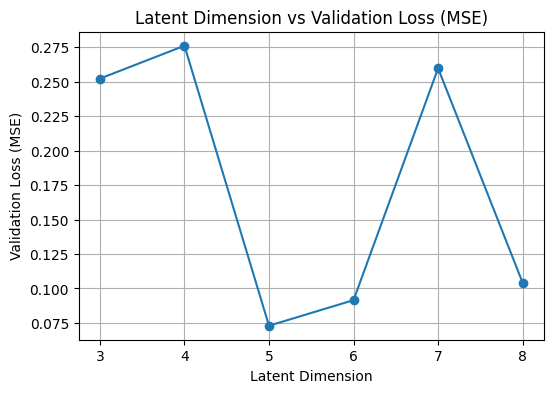

In [9]:
import matplotlib.pyplot as plt

latent_dims = [3, 4, 5, 6, 7, 8]
val_losses_final = []  # Lista para guardar val_loss de cada latent_dim
input_dim=3
input_dim=X_train.shape[1]

best_val_loss = float('inf')
best_model = None
best_latent_dim = None
best_history = None

for dim in latent_dims:
    # Definir arquitectura
    input_layer = layers.Input(shape=(input_dim,))
    x = layers.Dense(8, activation='relu')(input_layer)
    latent = layers.Dense(dim, activation='relu',
                          activity_regularizer=regularizers.l1(1e-4))(x)
    x = layers.Dense(8, activation='relu')(latent)
    output_layer = layers.Dense(input_dim, activation='linear')(x)

    autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='mse')

    # Entrenar
    history = autoencoder.fit(
        X_train, X_train,
        validation_data=(X_val, X_val),
        epochs=100,
        batch_size=32,
        shuffle=True,
        verbose=0
    )

    # Guardar el val_loss final
    val_loss_final = history.history['val_loss'][-1]
    val_losses_final.append(val_loss_final)

    print(f"Latent dim = {dim}, Validation Loss final = {val_loss_final:.6f}")

    # Guardar el mejor modelo
    if val_loss_final < best_val_loss:
        best_val_loss = val_loss_final
        best_latent_dim = dim
        best_model = autoencoder
        best_history = history

# Graficar latent_dim vs val_loss
plt.figure(figsize=(6,4))
plt.plot(latent_dims, val_losses_final, marker='o')
plt.title("Latent Dimension vs Validation Loss (MSE)")
plt.xlabel("Latent Dimension")
plt.ylabel("Validation Loss (MSE)")
plt.grid(True)
plt.show()


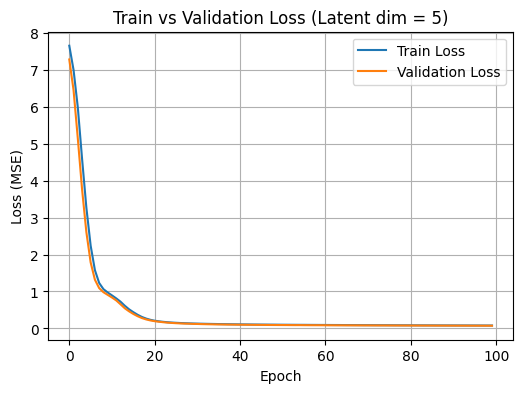

In [10]:
plt.figure(figsize=(6,4))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f"Train vs Validation Loss (Latent dim = {best_latent_dim})")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], alpha=0.5)
# ax.set_title("Espacio Latente 3D")
# ax.set_xlabel("Z1")
# ax.set_ylabel("Z2")
# ax.set_zlabel("Z3")
# plt.tight_layout()
# plt.show()


In [12]:
from tensorflow.keras import layers, models, regularizers

# Crear encoder usando la misma arquitectura
input_layer = layers.Input(shape=(input_dim,))
x = layers.Dense(8, activation='relu')(input_layer)
latent = layers.Dense(best_latent_dim, activation='relu',
                      activity_regularizer=regularizers.l1(1e-4))(x)

encoder = models.Model(inputs=input_layer, outputs=latent)

# Obtener la representación latente de todo el dataset
Z = encoder.predict(X_encoded_df)
print("Z shape:", Z.shape)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Z shape: (824, 5)


In [13]:
# from imblearn.over_sampling import SMOTE

# print("Antes SMOTE:", Y.value_counts())

# smote = SMOTE(random_state=42)
# Z, Y = smote.fit_resample(Z, Y)

# print("Despues SMOTE:", Y.value_counts())


# TSNE

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\Elias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
   

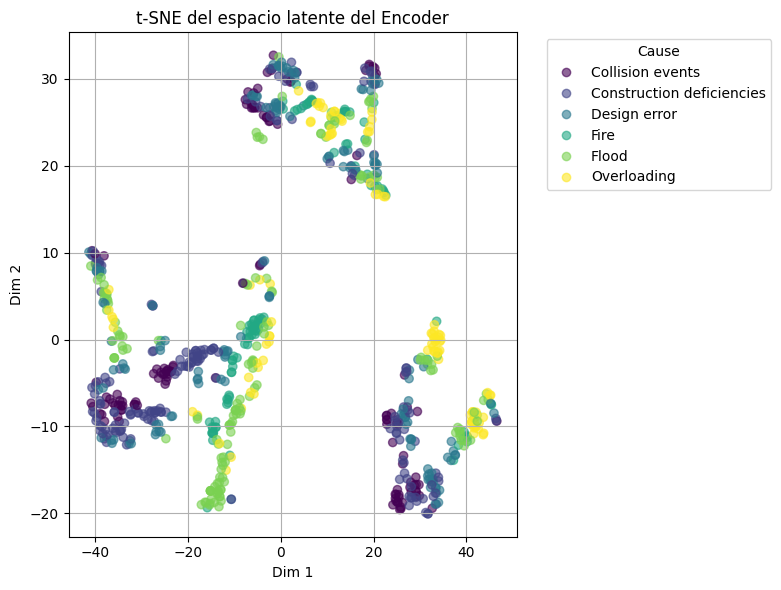

In [14]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Z es la salida del encoder
Z = encoder.predict(X_encoded_df)

# t-SNE del espacio latente
Z_tsne = TSNE(n_components=2, random_state=42).fit_transform(Z)

# Etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(temp_df['Cause'])

# Graficar
plt.figure(figsize=(8, 6))
scatter = plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.6)

# Crear leyenda personalizada
handles, _ = scatter.legend_elements()
labels = le.inverse_transform(range(len(handles)))

# Colocar la leyenda fuera del gráfico
plt.legend(handles, labels, title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("t-SNE del espacio latente del Encoder")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.tight_layout()  # Ajusta para evitar que se recorte la leyenda
plt.show()


In [15]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
# from sklearn.manifold import TSNE
# import matplotlib.patches as mpatches

# ordinal_encoder = OrdinalEncoder()
# X_encoded = ordinal_encoder.fit_transform(X)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(Y)

# scaler = StandardScaler()

# num_vars = X.shape[1]
# cols = 5
# rows = (num_vars // cols) + 1

# fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
# axs = axs.flatten()

# class_names = label_encoder.classes_

# for i, col in enumerate(X.columns):
#     feature_scaled = scaler.fit_transform(X_encoded[:, [i]]).ravel()
#     mini_df = np.column_stack((feature_scaled, y_encoded))
#     tsne = TSNE(n_components=2, random_state=42, n_iter=300)
#     tsne_result = tsne.fit_transform(mini_df)
    
#     scatter = axs[i].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_encoded, cmap='tab10', alpha=0.7)
#     axs[i].set_title(f't-SNE: {col} vs Target')
#     axs[i].set_xticks([])
#     axs[i].set_yticks([])

# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

# # Crear leyenda global
# handles = []
# for class_idx, class_name in enumerate(class_names):
#     handles.append(mpatches.Patch(color=scatter.cmap(scatter.norm(class_idx)), label=class_name))

# fig.legend(handles=handles, loc='upper center', ncol=len(class_names), fontsize=8)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para la leyenda arriba

# plt.show()


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
#encodificacion

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    #('scale', StandardScaler(), num_cols)
])

X_processed = preprocessor.fit_transform(X)

X_processed= X_processed.toarray()

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score


def optimize_clustering(X, cluster_range=[2, 3, 4, 5]):
    results = []
    all_labels = []

    for k in cluster_range:
        models = [
            ("KMeans", KMeans(n_clusters=k, random_state=42)),
            ("Agglomerative", AgglomerativeClustering(n_clusters=k)),
            ("Spectral", SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')),
            ("GaussianMixture", GaussianMixture(n_components=k, random_state=42))
        ]

        for name, model in models:
            try:
                if name == "GaussianMixture":
                    model.fit(X)
                    labels = model.predict(X)
                    inertia = None
                elif name == "KMeans":
                    model.fit(X)
                    labels = model.labels_
                    inertia = model.inertia_
                else:
                    labels = model.fit_predict(X)
                    inertia = None

                # Save metrics
                silhouette = silhouette_score(X, labels)
                db_score = davies_bouldin_score(X, labels)
                ch_score = calinski_harabasz_score(X, labels)

                results.append({
                    "Model": name,
                    "Clusters": k,
                    "Silhouette": silhouette,
                    "Davies-Bouldin": db_score,
                    "Calinski-Harabasz": ch_score,
                    "Inertia": inertia,
                    "Labels" :labels
                })

                

            except Exception as e:
                print(f"Error with {name} k={k}: {e}")

    results_df = pd.DataFrame(results)

    return results_df


In [19]:
results_df= optimize_clustering(Z,range(2,7))
results_df

Model  Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0            KMeans         2    0.612212        0.517074        2042.053711   
1     Agglomerative         2    0.578138        0.569473        1746.579956   
2          Spectral         2    0.549564        0.485633        1207.860474   
3   GaussianMixture         2    0.188097        1.049400          13.644752   
4            KMeans         3    0.557361        0.613753        2047.629150   
5     Agglomerative         3    0.547216        0.617641        1898.938965   
6          Spectral         3    0.550345        0.616875        1923.008545   
7   GaussianMixture         3    0.293584        0.905579         416.731873   
8            KMeans         4    0.586634        0.565353        2390.169922   
9     Agglomerative         4    0.565191        0.556650        2084.438477   
10         Spectral         4    0.567522        0.554313        2100.226807   
11  GaussianMixture         4    0.301388        1.163748         369.160339   
12           KMeans         5    0.511280        0.739277        2174.441895   
13    Agglomerative         5    0.479112        0.699961        1911.405151   
14         Spectral         5    0.417037        0.768149        1902.223022   
15  GaussianMixture         5    0.253967        1.508350         346.707397   
16           KMeans         6    0.461787        0.867541        1998.912354   
17    Agglomerative         6    0.400972        0.791024        1805.598022   
18         Spectral         6    0.344980        0.872553        1688.179565   
19  GaussianMixture         6    0.228576        1.455569         342.821808   

       Inertia                                             Labels  
0   642.191284  [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...  
1          NaN  [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...  
2          NaN  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...  
3          NaN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4   373.665100  [1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, ...  
5          NaN  [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, ...  
6          NaN  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, ...  
7          NaN  [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, ...  
8   229.653809  [3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, ...  
9          NaN  [1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, ...  
10         NaN  [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, ...  
11         NaN  [3, 2, 2, 2, 3, 3, 3, 0, 3, 3, 2, 2, 2, 0, 0, ...  
12  192.561081  [4, 2, 2, 2, 4, 4, 4, 3, 4, 4, 2, 2, 2, 3, 3, ...  
13         NaN  [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 4, ...  
14         NaN  [2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 1, 1, ...  
15         NaN  [4, 2, 2, 2, 4, 4, 4, 0, 4, 4, 2, 2, 2, 3, 3, ...  
16  169.277359  [4, 5, 5, 5, 4, 4, 4, 3, 4, 4, 5, 5, 5, 3, 3, ...  
17         NaN  [0, 2, 2, 2, 0, 0, 0, 5, 0, 0, 2, 2, 2, 4, 4, ...  
18         NaN  [4, 5, 5, 5, 4, 4, 4, 1, 4, 4, 5, 5, 5, 1, 1, ...  
19         NaN  [4, 5, 5, 5, 4, 4, 4, 0, 4, 4, 5, 5, 5, 3, 3, ...

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)

def optimize_clustering(X, y_true=None, cluster_range=[2, 3, 4, 5]):
    results = []

    for k in cluster_range:
        models = [
            ("KMeans", KMeans(n_clusters=k, random_state=42)),
            ("Agglomerative", AgglomerativeClustering(n_clusters=k)),
            ("Spectral", SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors')),
            ("GaussianMixture", GaussianMixture(n_components=k, random_state=42))
        ]

        for name, model in models:
            try:
                if name == "GaussianMixture":
                    model.fit(X)
                    labels = model.predict(X)
                    inertia = None
                elif name == "KMeans":
                    model.fit(X)
                    labels = model.labels_
                    inertia = model.inertia_
                else:
                    labels = model.fit_predict(X)
                    inertia = None

                # Internal metrics
                silhouette = silhouette_score(X, labels)
                db_score = davies_bouldin_score(X, labels)
                ch_score = calinski_harabasz_score(X, labels)

                # External metrics if true labels are provided
                ari = adjusted_rand_score(y_true, labels) if y_true is not None else None
                nmi = normalized_mutual_info_score(y_true, labels) if y_true is not None else None

                results.append({
                    "Model": name,
                    "Clusters": k,
                    "Silhouette": silhouette,
                    "Davies-Bouldin": db_score,
                    "Calinski-Harabasz": ch_score,
                    "Inertia": inertia,
                    "ARI": ari,
                    "NMI": nmi,
                    "Labels": labels  # keep the labels directly here
                })

            except Exception as e:
                print(f"Error with {name} k={k}: {e}")

    results_df = pd.DataFrame(results)

    return results_df


In [21]:
Y=temp_df['Cause']

In [22]:
results_df= optimize_clustering(Z,Y,range(2,11))


In [23]:
results_df.describe()

Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz     Inertia  \
count  36.000000   36.000000       36.000000          36.000000    9.000000   
mean    6.000000    0.405321        1.003881        1485.333618  233.419746   
std     2.618615    0.121621        0.644942         693.432495  173.883618   
min     2.000000    0.154190        0.485633          13.644752  102.752289   
25%     4.000000    0.334082        0.679381        1185.935028  127.237526   
50%     6.000000    0.393318        0.870047        1776.334839  169.277359   
75%     8.000000    0.520264        0.928955        1925.610077  229.653839   
max    10.000000    0.612212        3.918076        2390.169922  642.191284   

             ARI        NMI  
count  36.000000  36.000000  
mean    0.045181   0.085915  
std     0.025121   0.053110  
min    -0.000942   0.003442  
25%     0.024087   0.037181  
50%     0.043602   0.079667  
75%     0.066567   0.135226  
max     0.084188   0.173049

In [24]:
results_df

Model  Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0            KMeans         2    0.612212        0.517074        2042.053711   
1     Agglomerative         2    0.578138        0.569473        1746.579956   
2          Spectral         2    0.549564        0.485633        1207.860474   
3   GaussianMixture         2    0.188097        1.049400          13.644752   
4            KMeans         3    0.557361        0.613753        2047.629150   
5     Agglomerative         3    0.547216        0.617641        1898.938965   
6          Spectral         3    0.550345        0.616875        1923.008545   
7   GaussianMixture         3    0.293584        0.905579         416.731873   
8            KMeans         4    0.586634        0.565353        2390.169922   
9     Agglomerative         4    0.565191        0.556650        2084.438477   
10         Spectral         4    0.567522        0.554313        2100.226807   
11  GaussianMixture         4    0.301388        1.163748         369.160339   
12           KMeans         5    0.511280        0.739277        2174.441895   
13    Agglomerative         5    0.479112        0.699961        1911.405151   
14         Spectral         5    0.417037        0.768149        1902.223022   
15  GaussianMixture         5    0.253967        1.508350         346.707397   
16           KMeans         6    0.461787        0.867541        1998.912354   
17    Agglomerative         6    0.400972        0.791024        1805.598022   
18         Spectral         6    0.344980        0.872553        1688.179565   
19  GaussianMixture         6    0.228576        1.455569         342.821808   
20           KMeans         7    0.377285        0.927473        1983.561401   
21    Agglomerative         7    0.423181        0.834315        1739.292847   
22         Spectral         7    0.354878        0.821161        1488.445557   
23  GaussianMixture         7    0.269476        2.467984         295.823792   
24           KMeans         8    0.392173        0.906317        1933.414673   
25    Agglomerative         8    0.379598        0.888239        1758.348389   
26         Spectral         8    0.377609        0.873763        1704.513916   
27  GaussianMixture         8    0.243886        2.072094         201.355499   
28           KMeans         9    0.381112        0.913342        1802.443237   
29    Agglomerative         9    0.395697        0.912814        1816.018677   
30         Spectral         9    0.394463        0.819922        1686.492798   
31  GaussianMixture         9    0.401597        1.204851        1120.158691   
32           KMeans        10    0.389129        0.907043        1879.130493   
33    Agglomerative        10    0.362990        0.933402        1794.321289   
34         Spectral        10    0.299328        0.820993        1559.021851   
35  GaussianMixture        10    0.154190        3.918076         298.938385   

       Inertia       ARI       NMI  \
0   642.191284  0.017091  0.023404   
1          NaN  0.020560  0.029358   
2          NaN  0.012563  0.022096   
3          NaN -0.000942  0.003442   
4   373.665100  0.024094  0.027495   
5          NaN  0.028302  0.033078   
6          NaN  0.026044  0.031232   
7          NaN  0.010918  0.025267   
8   229.653839  0.019668  0.034235   
9          NaN  0.026119  0.039504   
10         NaN  0.024384  0.038163   
11         NaN  0.020965  0.039322   
12  192.561050  0.028303  0.048440   
13         NaN  0.035762  0.066793   
14         NaN  0.036464  0.059195   
15         NaN  0.022329  0.039904   
16  169.277359  0.051770  0.100143   
17         NaN  0.051697  0.090802   
18         NaN  0.063162  0.125442   
19         NaN  0.049932  0.113278   
20  143.737030  0.074606  0.134042   
21         NaN  0.051301  0.100240   
22         NaN  0.059255  0.128862   
23         NaN  0.056357  0.123783   
24  127.237526  0.083626  0.152490   
25         NaN  0.082343  0.164760   
26         NaN  0.074038  0

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne_clusters_with_metrics(X, results_df, perplexity=30, random_state=42):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    X_tsne = tsne.fit_transform(X)
    
    clusters_unique = sorted(results_df['Clusters'].unique())
    
    for k in clusters_unique:
        subset = results_df[results_df['Clusters'] == k]
        
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"t-SNE Clustering con k={k}", fontsize=16)
        
        for i, (_, row) in enumerate(subset.iterrows()):
            labels = row['Labels']
            ax = axs[i]
            
            scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
            ax.set_title(row['Model'])
            ax.set_xticks([])
            ax.set_yticks([])
            
            inertia_val = row['Inertia']
            inertia_str = 'N/A' if (inertia_val is None or np.isnan(inertia_val)) else f"{inertia_val:.1f}"
            
            metrics_text = (
                f"Silhouette: {row['Silhouette']:.3f}\n"
                f"Davies-Bouldin: {row['Davies-Bouldin']:.3f}\n"
                f"Calinski-Harabasz: {row['Calinski-Harabasz']:.1f}\n"
                f"Inertia: {inertia_str}\n"
                f"ARI: {row['ARI']:.3f}\n"
                f"NMI: {row['NMI']:.3f}"
            )
            
            ax.text(0.95, 0.05, metrics_text,
                    verticalalignment='bottom', horizontalalignment='right',
                    transform=ax.transAxes,
                    fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
            
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


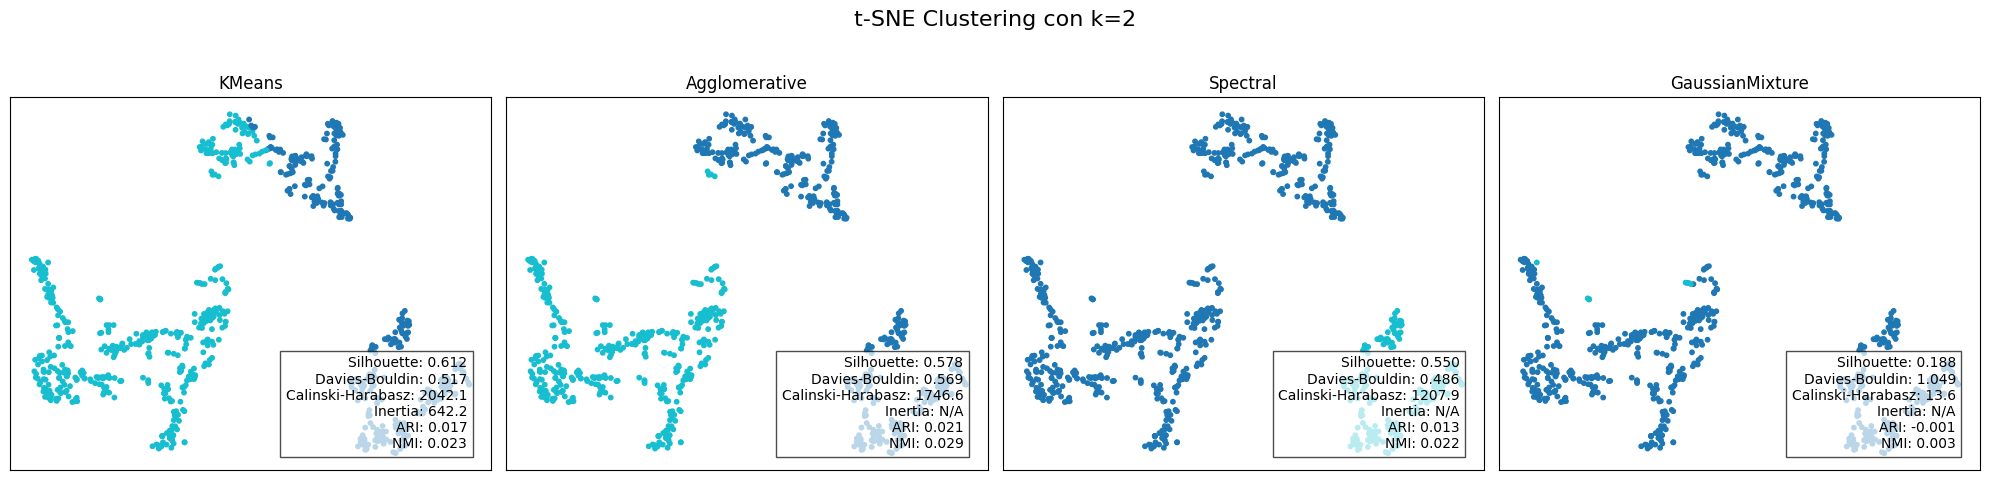

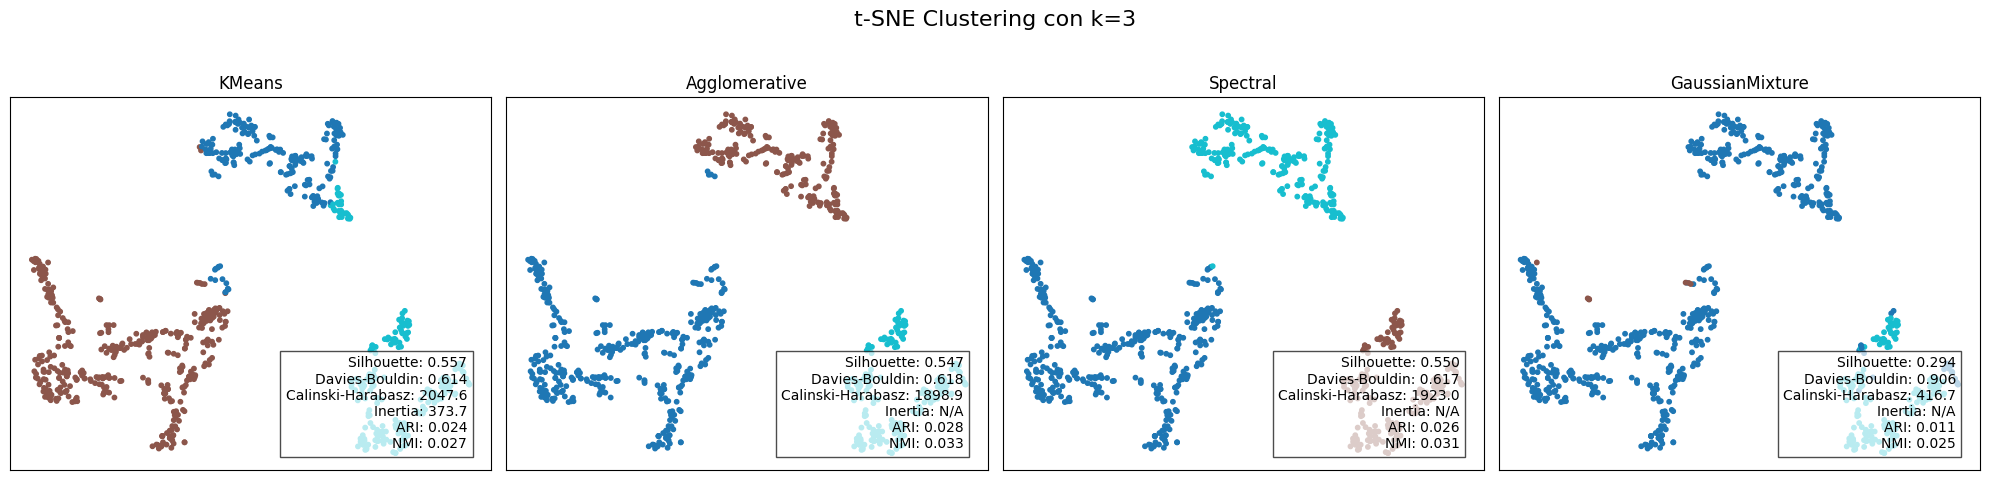

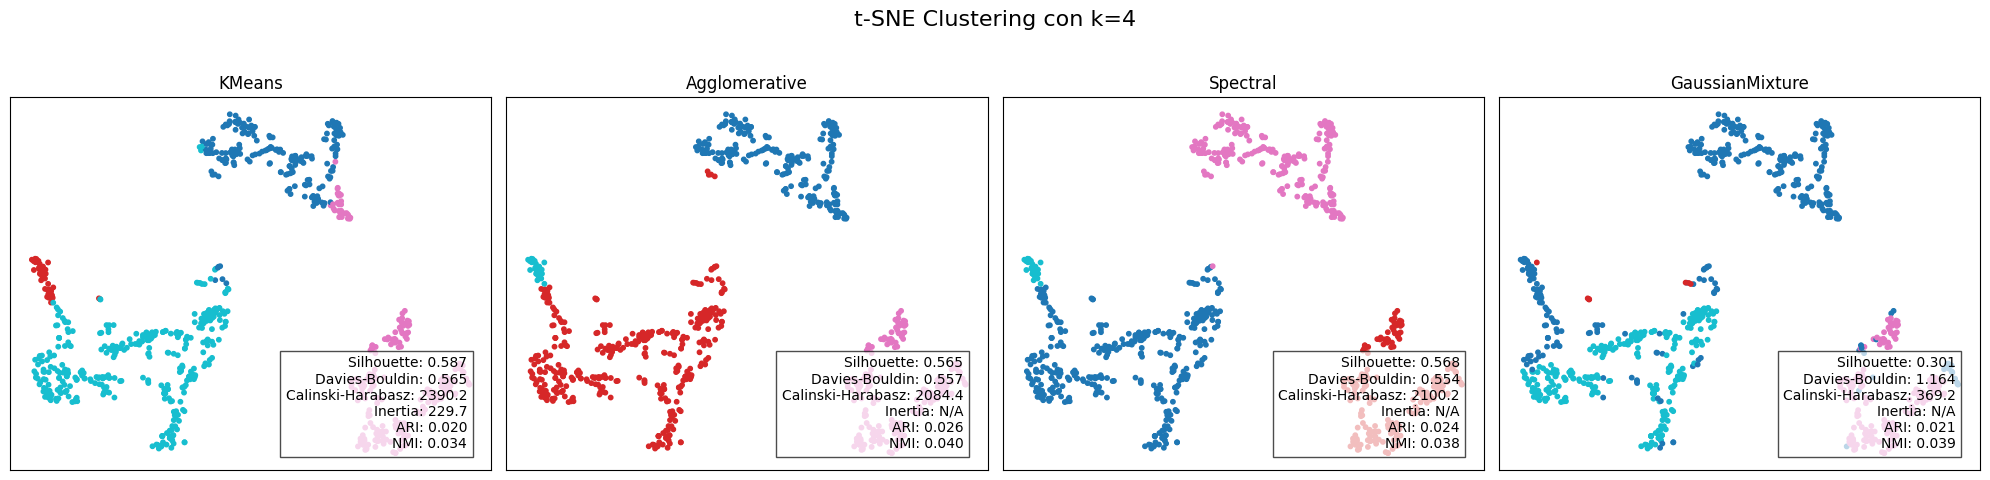

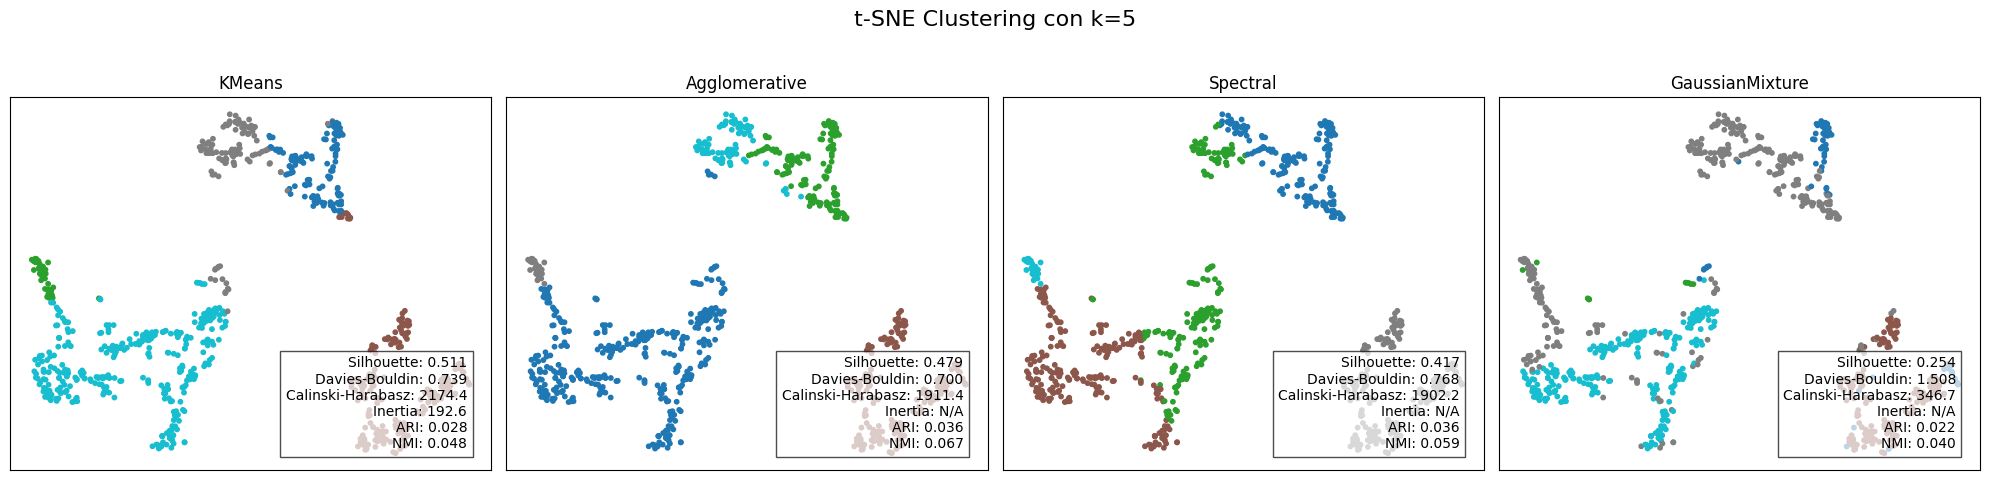

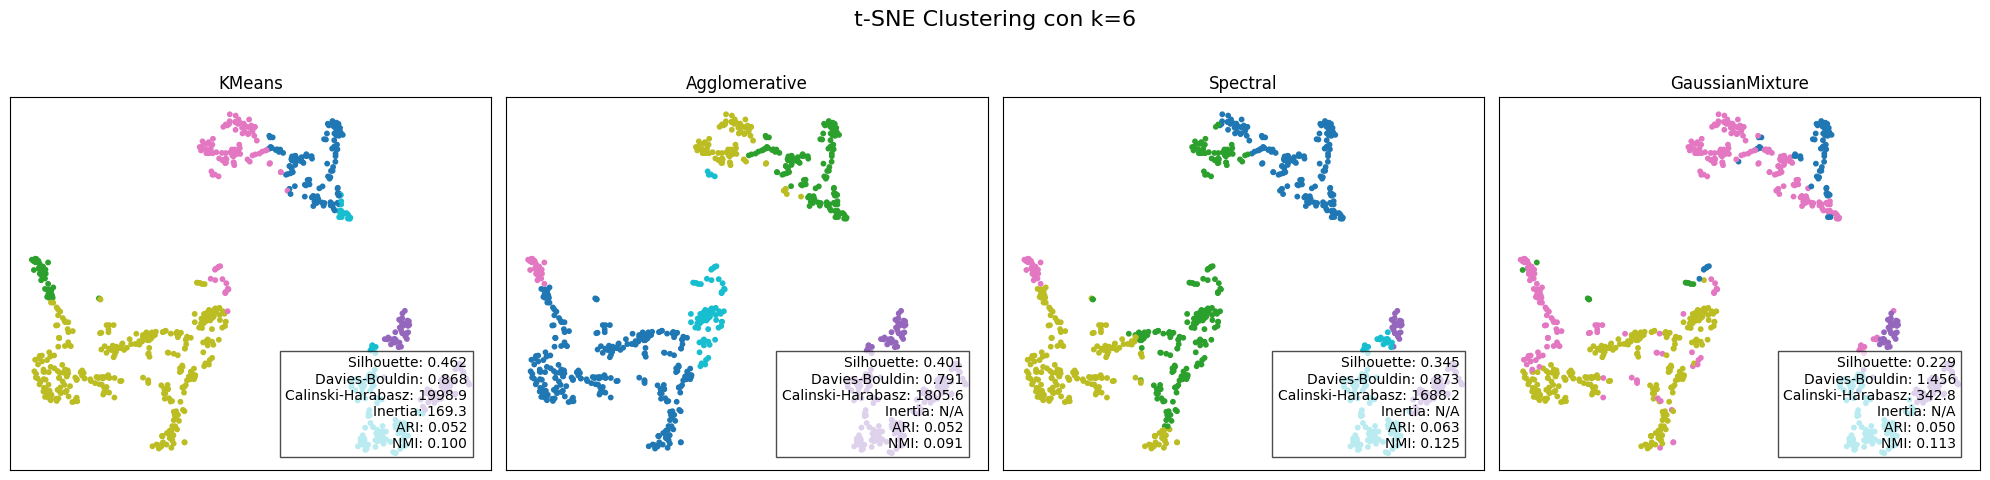

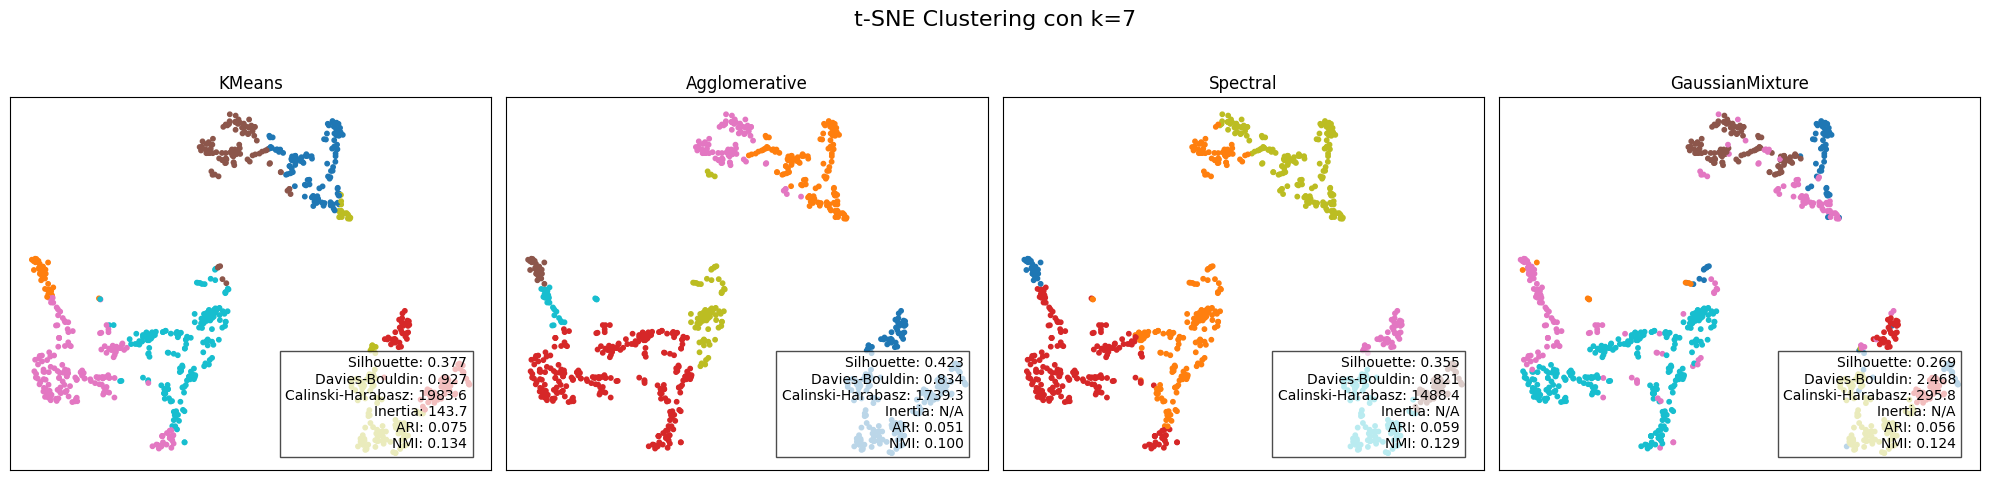

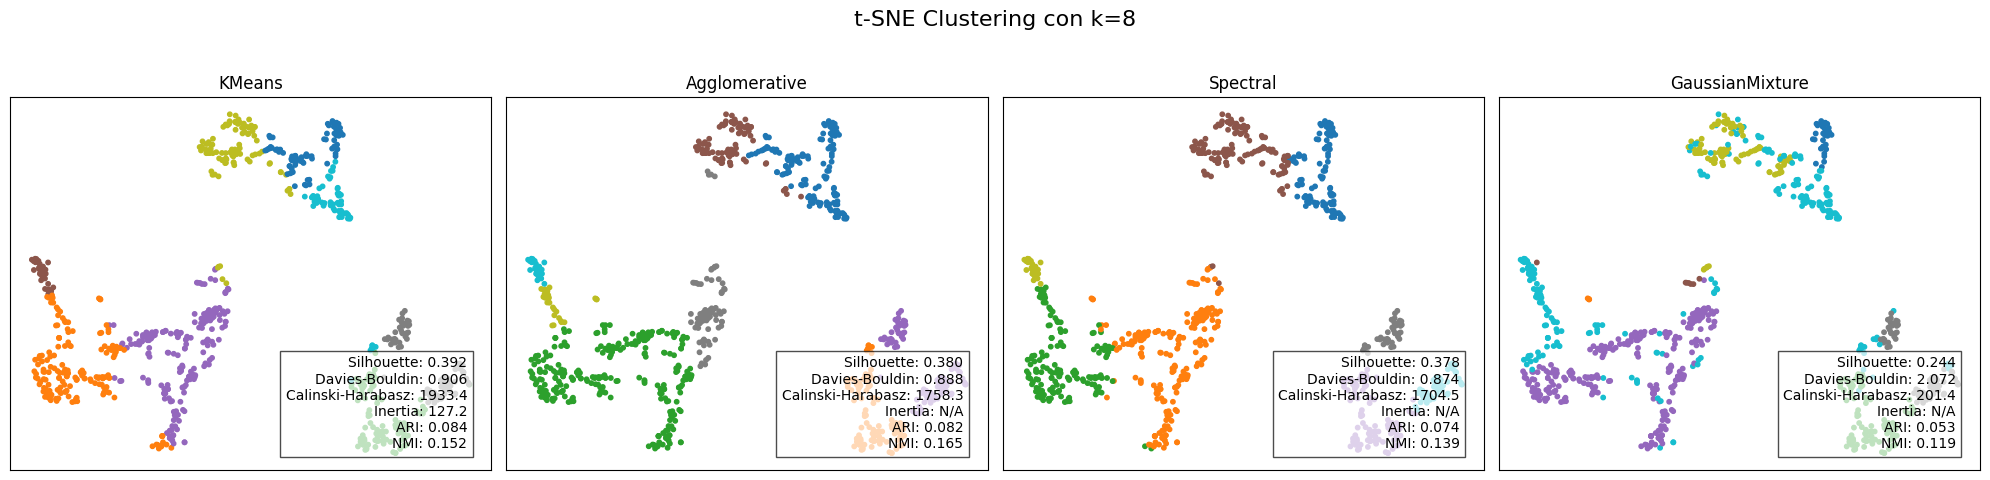

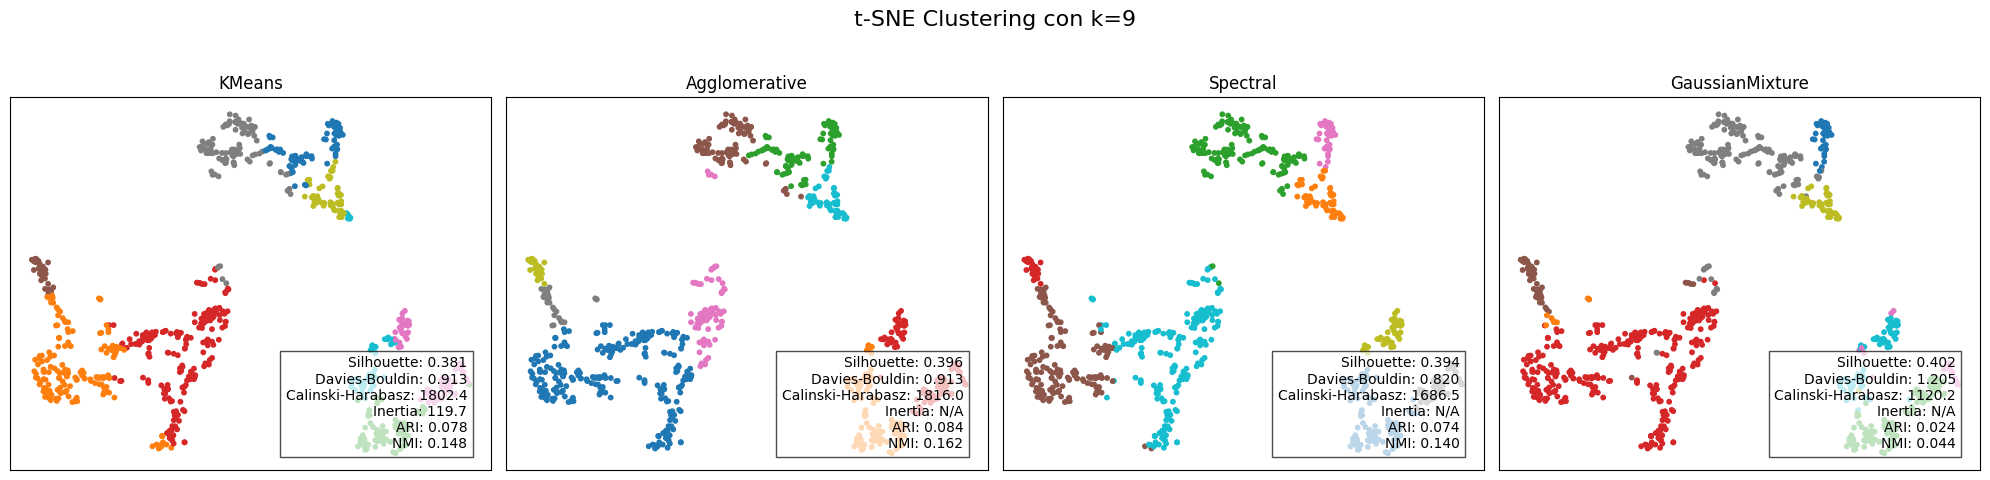

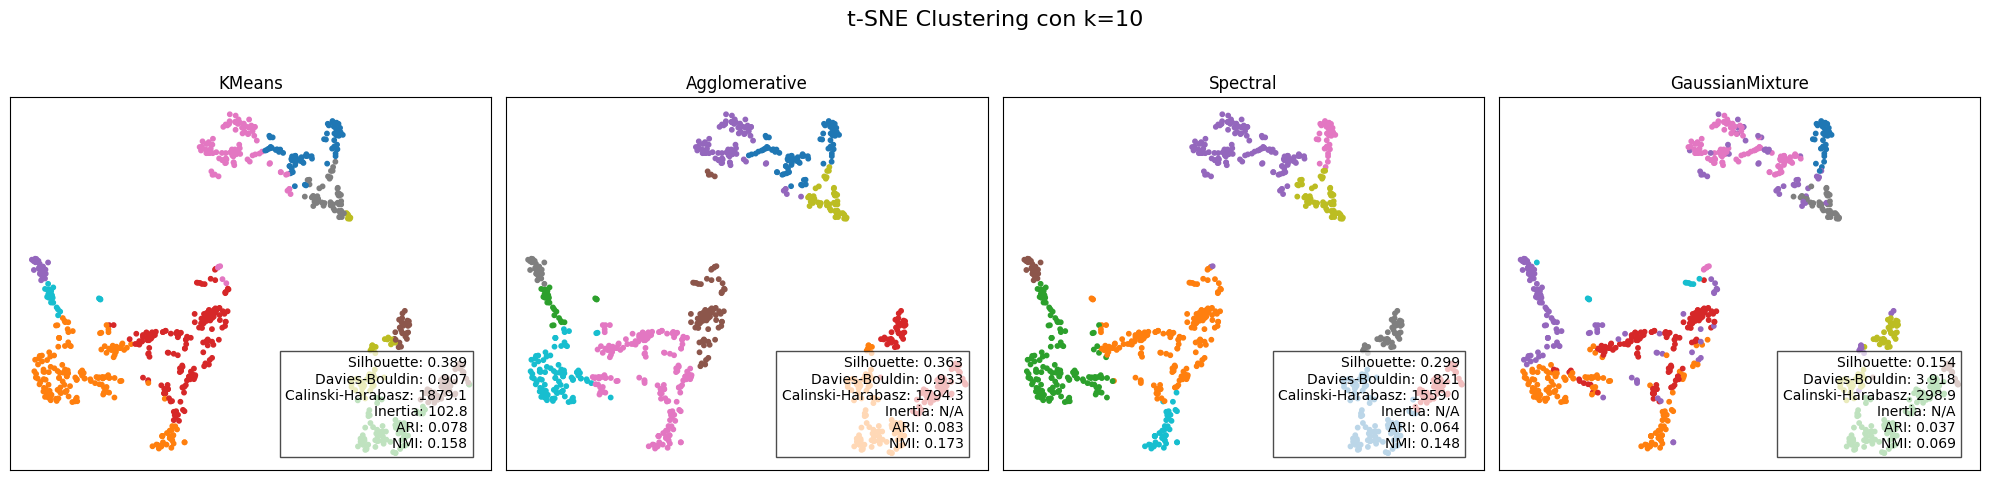

In [26]:


plot_tsne_clusters_with_metrics(Z, results_df)


In [27]:
def attach_clusters(results_df, model_index, original_df):
    """
    Given a row index in the results_df and the original dataset,
    attach the cluster labels of that model to the original_df.

    Parameters
    ----------
    results_df : pd.DataFrame
        DataFrame containing model results (must have a 'Labels' column)
    model_index : int
        Row index of the chosen model (e.g., 0 for KMeans with 2 clusters)
    original_df : pd.DataFrame
        The original data before clustering (e.g., temp_df)

    Returns
    -------
    pd.DataFrame
        Copy of original_df with a new column 'cluster' containing labels
    """
    # extract the labels from the results table
    labels = results_df.loc[model_index, 'Labels']

    # ensure the length matches
    if len(labels) != len(original_df):
        raise ValueError("Number of labels doesn't match original data length.")

    # make a copy of the original and add the cluster column
    df_with_clusters = original_df.copy()
    df_with_clusters['cluster'] = labels

    return df_with_clusters


In [ ]:
results_df=results_df[results_df['Silhouette']>0.4]

results_df=results_df.reset_index()

results_df=results_df.drop('level_0')

ValueError: cannot insert level_0, already exists

In [41]:
results_df=results_df.drop(['level_0','index'],axis=1)

In [42]:
results_df

Model  Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0            KMeans         2    0.612212        0.517074        2042.053711   
1     Agglomerative         2    0.578138        0.569473        1746.579956   
2          Spectral         2    0.549564        0.485633        1207.860474   
3            KMeans         3    0.557361        0.613753        2047.629150   
4     Agglomerative         3    0.547216        0.617641        1898.938965   
5          Spectral         3    0.550345        0.616875        1923.008545   
6            KMeans         4    0.586634        0.565353        2390.169922   
7     Agglomerative         4    0.565191        0.556650        2084.438477   
8          Spectral         4    0.567522        0.554313        2100.226807   
9            KMeans         5    0.511280        0.739277        2174.441895   
10    Agglomerative         5    0.479112        0.699961        1911.405151   
11         Spectral         5    0.417037        0.768149        1902.223022   
12           KMeans         6    0.461787        0.867541        1998.912354   
13    Agglomerative         6    0.400972        0.791024        1805.598022   
14    Agglomerative         7    0.423181        0.834315        1739.292847   
15  GaussianMixture         9    0.401597        1.204851        1120.158691   

       Inertia       ARI       NMI  \
0   642.191284  0.017091  0.023404   
1          NaN  0.020560  0.029358   
2          NaN  0.012563  0.022096   
3   373.665100  0.024094  0.027495   
4          NaN  0.028302  0.033078   
5          NaN  0.026044  0.031232   
6   229.653839  0.019668  0.034235   
7          NaN  0.026119  0.039504   
8          NaN  0.024384  0.038163   
9   192.561050  0.028303  0.048440   
10         NaN  0.035762  0.066793   
11         NaN  0.036464  0.059195   
12  169.277359  0.051770  0.100143   
13         NaN  0.051697  0.090802   
14         NaN  0.051301  0.100240   
15         NaN  0.024067  0.043929   

                                               Labels  
0   [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, ...  
1   [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...  
2   [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...  
3   [1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, ...  
4   [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, ...  
5   [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, ...  
6   [3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, ...  
7   [1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, ...  
8   [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, ...  
9   [4, 2, 2, 2, 4, 4, 4, 3, 4, 4, 2, 2, 2, 3, 3, ...  
10  [0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 4, ...  
11  [2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 1, 1, ...  
12  [4, 5, 5, 5, 4, 4, 4, 3, 4, 4, 5, 5, 5, 3, 3, ...  
13  [0, 2, 2, 2, 0, 0, 0, 5, 0, 0, 2, 2, 2, 4, 4, ...  
14  [2, 0, 0, 0, 2, 2, 2, 5, 2, 2, 0, 0, 0, 4, 4, ...  
15  [3, 8, 2, 8, 3, 3, 3, 6, 3, 3, 8, 2, 2, 6, 6, ...

In [48]:
model2=attach_clusters(results_df,0,root_df)
model3=attach_clusters(results_df,3,root_df)
model4=attach_clusters(results_df,6,root_df)
model5=attach_clusters(results_df,10,root_df)
model6=attach_clusters(results_df,12,root_df)

ns_models=[]

ns_models.append(model2)
ns_models.append(model3)
ns_models.append(model4)
ns_models.append(model5)
ns_models.append(model6)

ns_names=['model2','model3','model4','model5','model6']

for name , df in zip(ns_names, ns_models):
    df.to_csv(f"{name}.csv",index=False)



# Continue


### Graficar Modelos Obtenidos

In [ ]:
#Guardar Modelos

model1=results_df.iloc[0]
model2=results_df.iloc[3]
model3=results_df.iloc[9
model4=results_df.iloc[10]



SyntaxError: invalid syntax (935508881.py, line 5)

In [ ]:
optimized_clusters=[model1,model2,model3,model4]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def graph_tsne(model, Z):
    k = model['Clusters']
    labels = model['Labels']
    title = model['Model']
    sil = model['Silhouette']
    dbi = model['Davies-Bouldin']
    cal = model['Calinski-Harabasz']
    inertia = model.get('Inertia', np.nan)

    # t-SNE embedding
    tsne = TSNE(n_components=2, random_state=42)
    X_embedded = tsne.fit_transform(Z)

    # Plotting
    plt.figure(figsize=(9, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')

    # Title and axes
    plt.title(f'{title} (k={k})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')

    # Metrics as legend in top-left of plot
    metrics_text = (
        f'Silhouette: {sil:.3f}\n'
        f'Davies-Bouldin: {dbi:.3f}\n'
        f'Calinski-Harabasz: {cal:.1f}'
    )
    if title == 'KMeans' and not np.isnan(inertia):
        metrics_text += f'\nInertia: {inertia:.1f}'

    # Text box inside the plot (top-left)
    plt.gca().text(
        0.02, 0.98, metrics_text,
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='left',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
    )

    plt.tight_layout()
    plt.show()


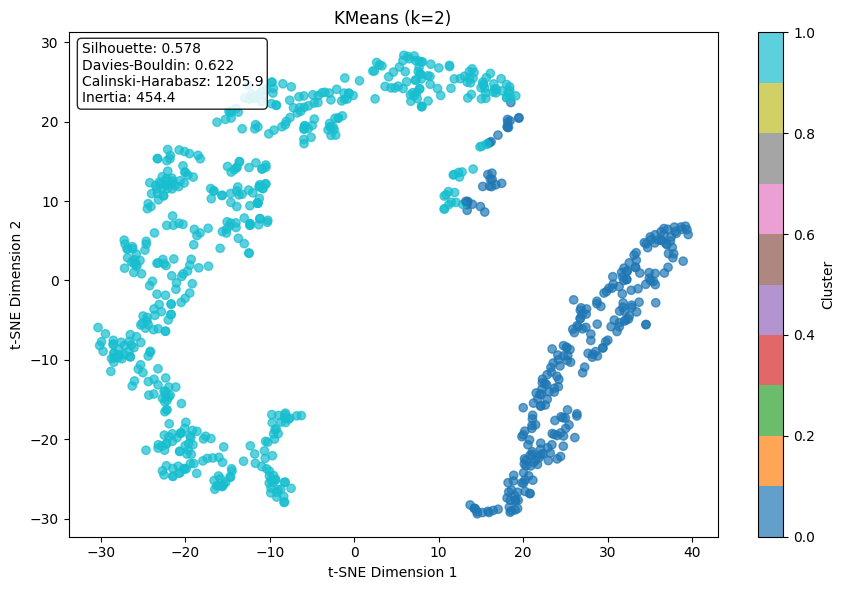

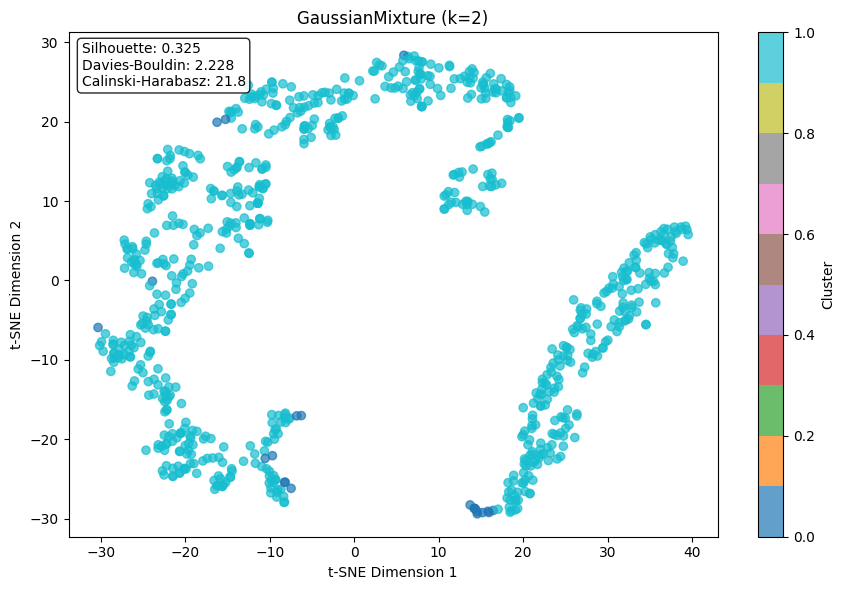

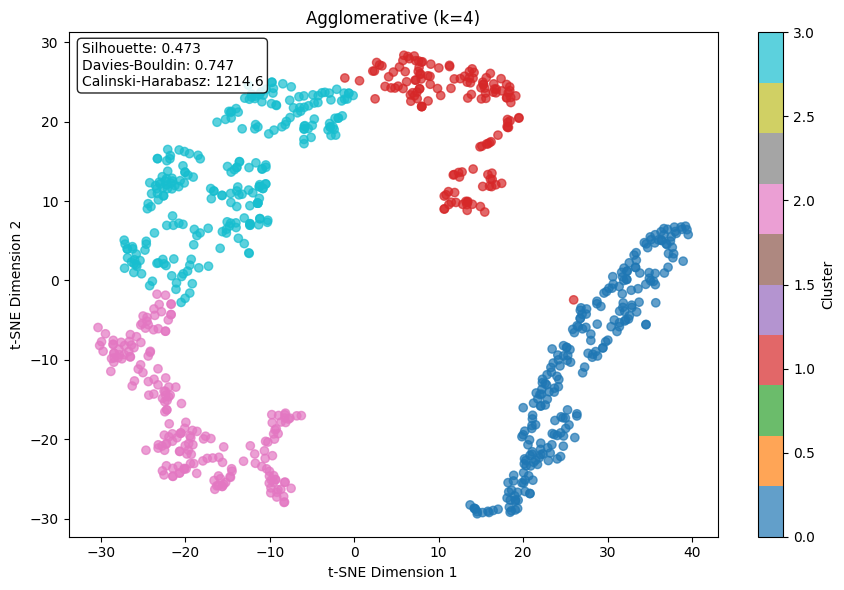

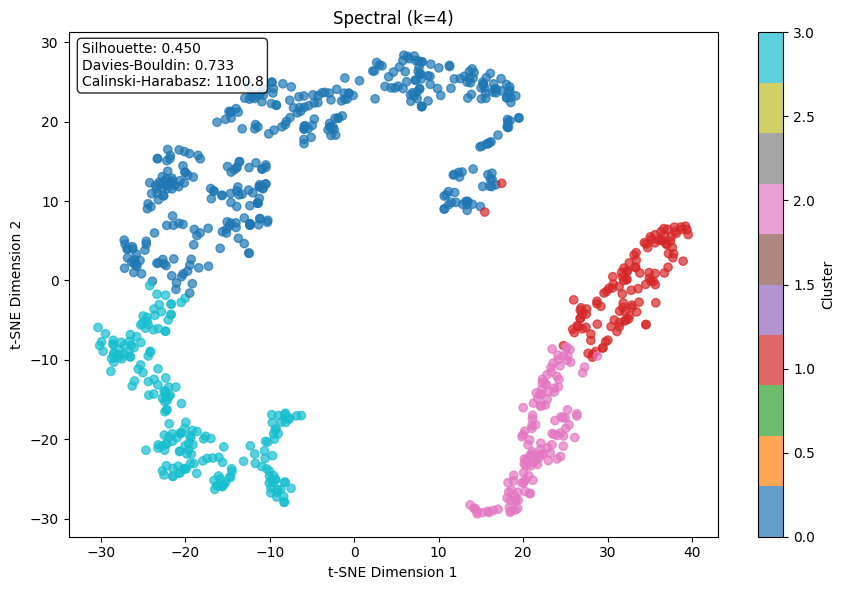

In [ ]:
for model in optimized_clusters:
    graph_tsne(model,Z)

### Analisis de Clusters

In [ ]:
temp_df

Type                      Cause             Material Collapse  \
41          Beam           Collision events  Reinforced concrete    Total   
43         Truss           Collision events                Steel    Total   
45         Truss           Collision events                Steel  Partial   
46    Suspension           Collision events                 Wood  Partial   
48          Beam           Collision events  Reinforced concrete    Total   
...          ...                        ...                  ...      ...   
1501        Beam  Construction deficiencies  Reinforced concrete    Total   
1503        Beam                      Flood            Composite  Partial   
1505        Beam                      Flood  Reinforced concrete    Total   
1506        Beam  Construction deficiencies            Composite    Total   
1511        Beam                      Flood                Steel    Total   

      temperature_1.9  temperature_1.9.1  temperature_4.5  temperature_7.0  \
41           -0.36346          -0.306055         -0.24865        -0.225425   
43            0.96894           1.784090          1.65721         1.445855   
45            0.40503           0.348125          0.21938         0.244370   
46           -0.37668           0.055205         -0.03791        -0.281860   
48           -0.01883           0.183450          0.26149         0.136105   
...               ...                ...              ...              ...   
1501          1.06424           0.899050          1.01453         1.045700   
1503          1.67965           1.289420          1.18791         1.369190   
1505          1.57352           1.523960          1.32506         1.351885   
1506          1.42284           1.466040          1.65549         1.288590   
1511          1.20058           1.338295          1.28168         1.226600   

      temperature_8.5  
41           -0.24865  
43            1.41198  
45            0.21938  
46           -0.05782  
48            0.11345  
...               ...  
1501          1.01453  
1503          1.30962  
1505          1.60314  
1506          1.42562  
1511          1.14276  

[824 rows x 9 columns]

In [ ]:
def get_cluster_data(df,model,k):

    cluster_data=[]
    base_string="_clusters"

    model=model+base_string

    for n in range(k):
        cluster_data.append(df[df[model] == n])

    return cluster_data
        
    

In [ ]:
model_kmeans_1 = optimized_clusters[0]

labels = model_kmeans_1['Labels']

kmeans_cluster_data = temp_df.copy()
kmeans_cluster_data['KMeans_clusters'] = labels

clusters_kmeans_data = get_cluster_data(kmeans_cluster_data, 'KMeans', model_kmeans_1['Clusters'])


In [ ]:
model_gaussian_2 = optimized_clusters[1]

labels = model_gaussian_2['Labels']

kmeans2_cluster_data = temp_df.copy()
kmeans2_cluster_data['Gaussian_clusters'] = labels

clusters_gaussian_data = get_cluster_data(kmeans2_cluster_data, 'Gaussian', model_gaussian_2['Clusters'])


In [ ]:
model_agglomerative_4 = optimized_clusters[2]

labels = model_agglomerative_4['Labels']

spectral_cluster_data = temp_df.copy()
spectral_cluster_data['Agglomerative_clusters'] = labels

clusters_aglomerative_data = get_cluster_data(spectral_cluster_data, 'Agglomerative', model_agglomerative_4['Clusters'])


In [ ]:
# df_kmeans_cluster0 = clusters_kmeans_data[0]
# df_kmeans_cluster1 = clusters_kmeans_data[1]

# df_kmeans2_cluster0 = clusters_kmeans2_data[0]
# df_kmeans2_cluster1 = clusters_kmeans2_data[1]
# df_kmeans2_cluster2 = clusters_kmeans2_data[2]
# df_kmeans2_cluster3 = clusters_kmeans2_data[3]

# df_spectral_cluster0 = clusters_spectral_data[0]
# df_spectral_cluster1 = clusters_spectral_data[1]


In [ ]:
def plot_top_values(df, column, total_count, ax=None):
    if ax is None:
        ax = plt.gca()
    top_values = df[column].value_counts()
    sns.barplot(x=top_values.values, y=top_values.index, ax=ax)
    ax.set_title(f'Top {column} Values')
    ax.set_xlabel('Count')
    ax.set_ylabel(column)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

def cluster_analysis_graph(df):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Year'] = df['Date'].dt.year

    # Preparar layout
    fig = plt.figure(constrained_layout=True, figsize=(20, 18))
    spec = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Histograma de años
    ax0 = fig.add_subplot(spec[0, 0])
    sns.histplot(df['Year'].dropna(), bins=10, kde=False, discrete=True, ax=ax0)
    ax0.set_xlabel('Año de colapso')
    ax0.set_ylabel('Número de colapsos')
    ax0.set_title('Histograma de colapsos por año')
    ax0.grid(True)

    # Top Materiales
    ax1 = fig.add_subplot(spec[0, 1])
    plot_top_values(df, 'Material', df['Material'].value_counts().sum(), ax=ax1)

    # Top Collapse
    ax2 = fig.add_subplot(spec[0, 2])
    plot_top_values(df, 'Collapse', df['Collapse'].value_counts().sum(), ax=ax2)

    # Top Cause
    ax3 = fig.add_subplot(spec[1, 0])
    plot_top_values(df, 'Cause', df['Cause'].value_counts().sum(), ax=ax3)

    # Top Status
    ax4 = fig.add_subplot(spec[1, 1])
    plot_top_values(df, 'Status', df['Status'].value_counts().sum(), ax=ax4)

    # Pie chart de países
    ax5 = fig.add_subplot(spec[1, 2])
    country_counts = df['Country'].value_counts()
    ax5.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
    ax5.set_title('Bridge Collapses by Country')

    # Collapse by Material (Stacked bar)
    ax6 = fig.add_subplot(spec[2, :])
    collapse_by_material = pd.crosstab(df['Material'], df['Collapse'], normalize='index') * 100
    collapse_by_material.plot(kind='bar', stacked=True, ax=ax6, legend=True)
    ax6.set_title('Type of Collapse by Construction Material (%)')
    ax6.set_ylabel('Percentage')
    ax6.set_xlabel('Material')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
    ax6.legend(title='Collapse Type')

    plt.tight_layout()
    plt.show()


## Kmeans Clusters Analysis

### Cluster 1


In [ ]:
for cluster in clusters_kmeans_data:
    cluster_analysis_graph(cluster)

KeyError: 'Date'

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


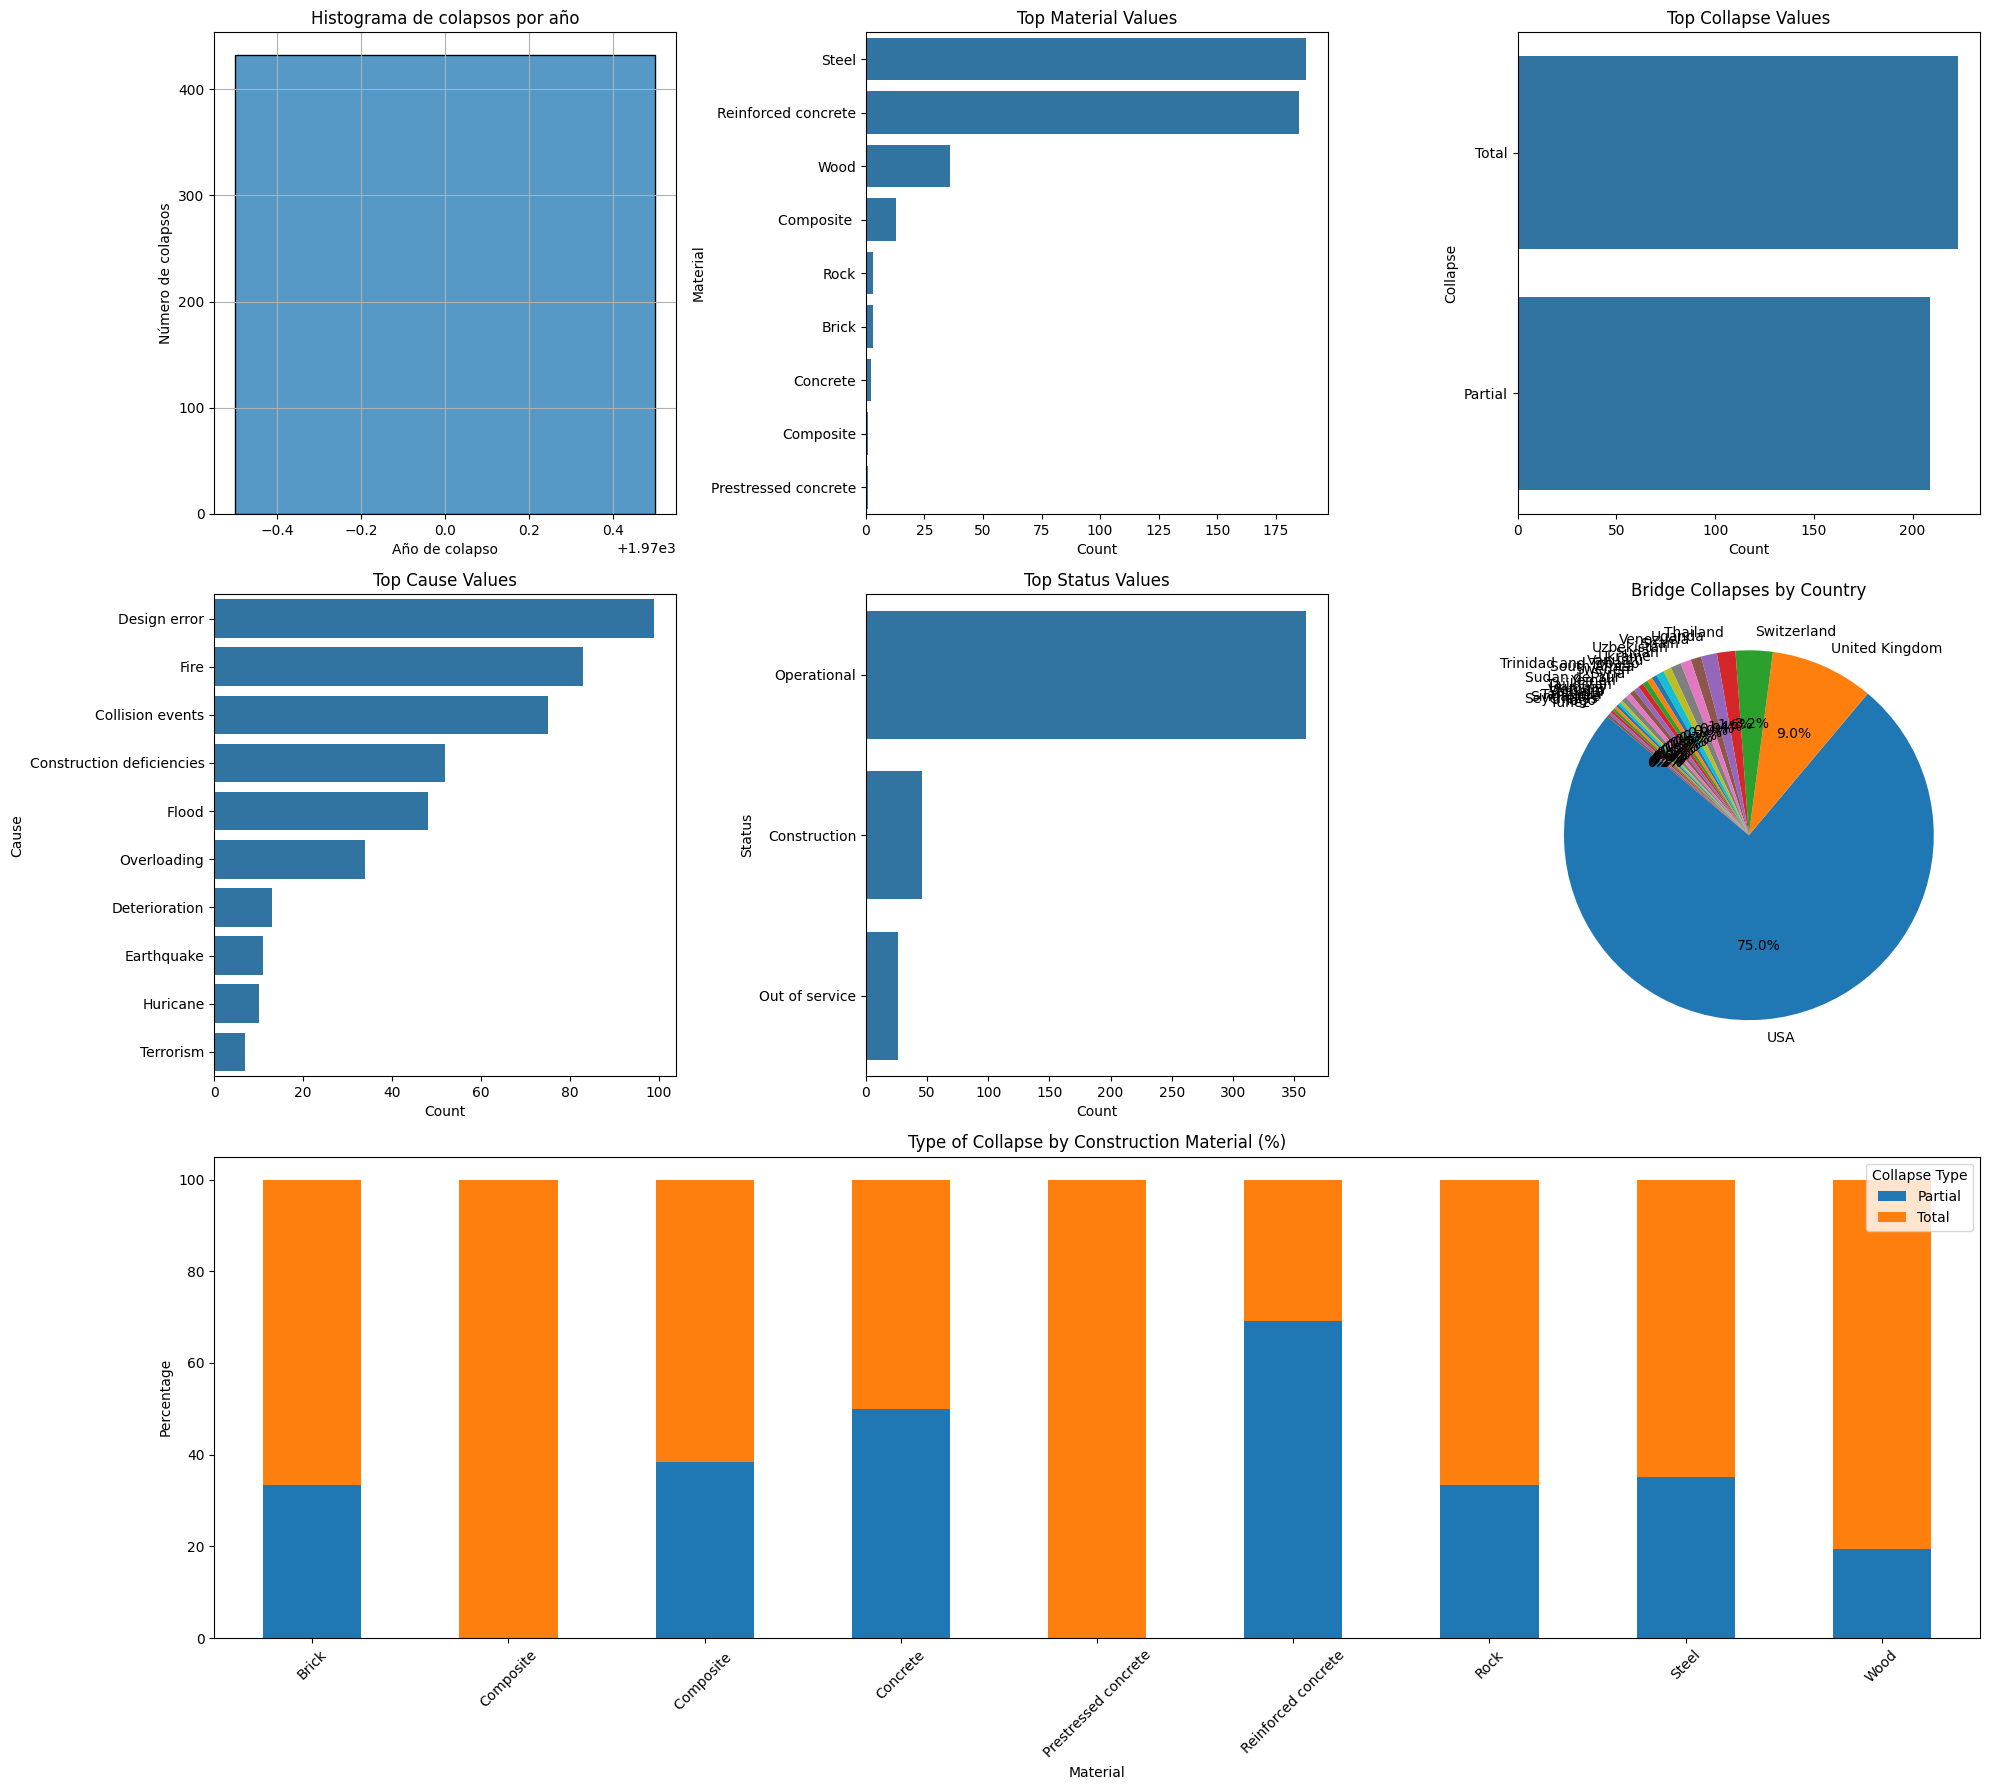

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


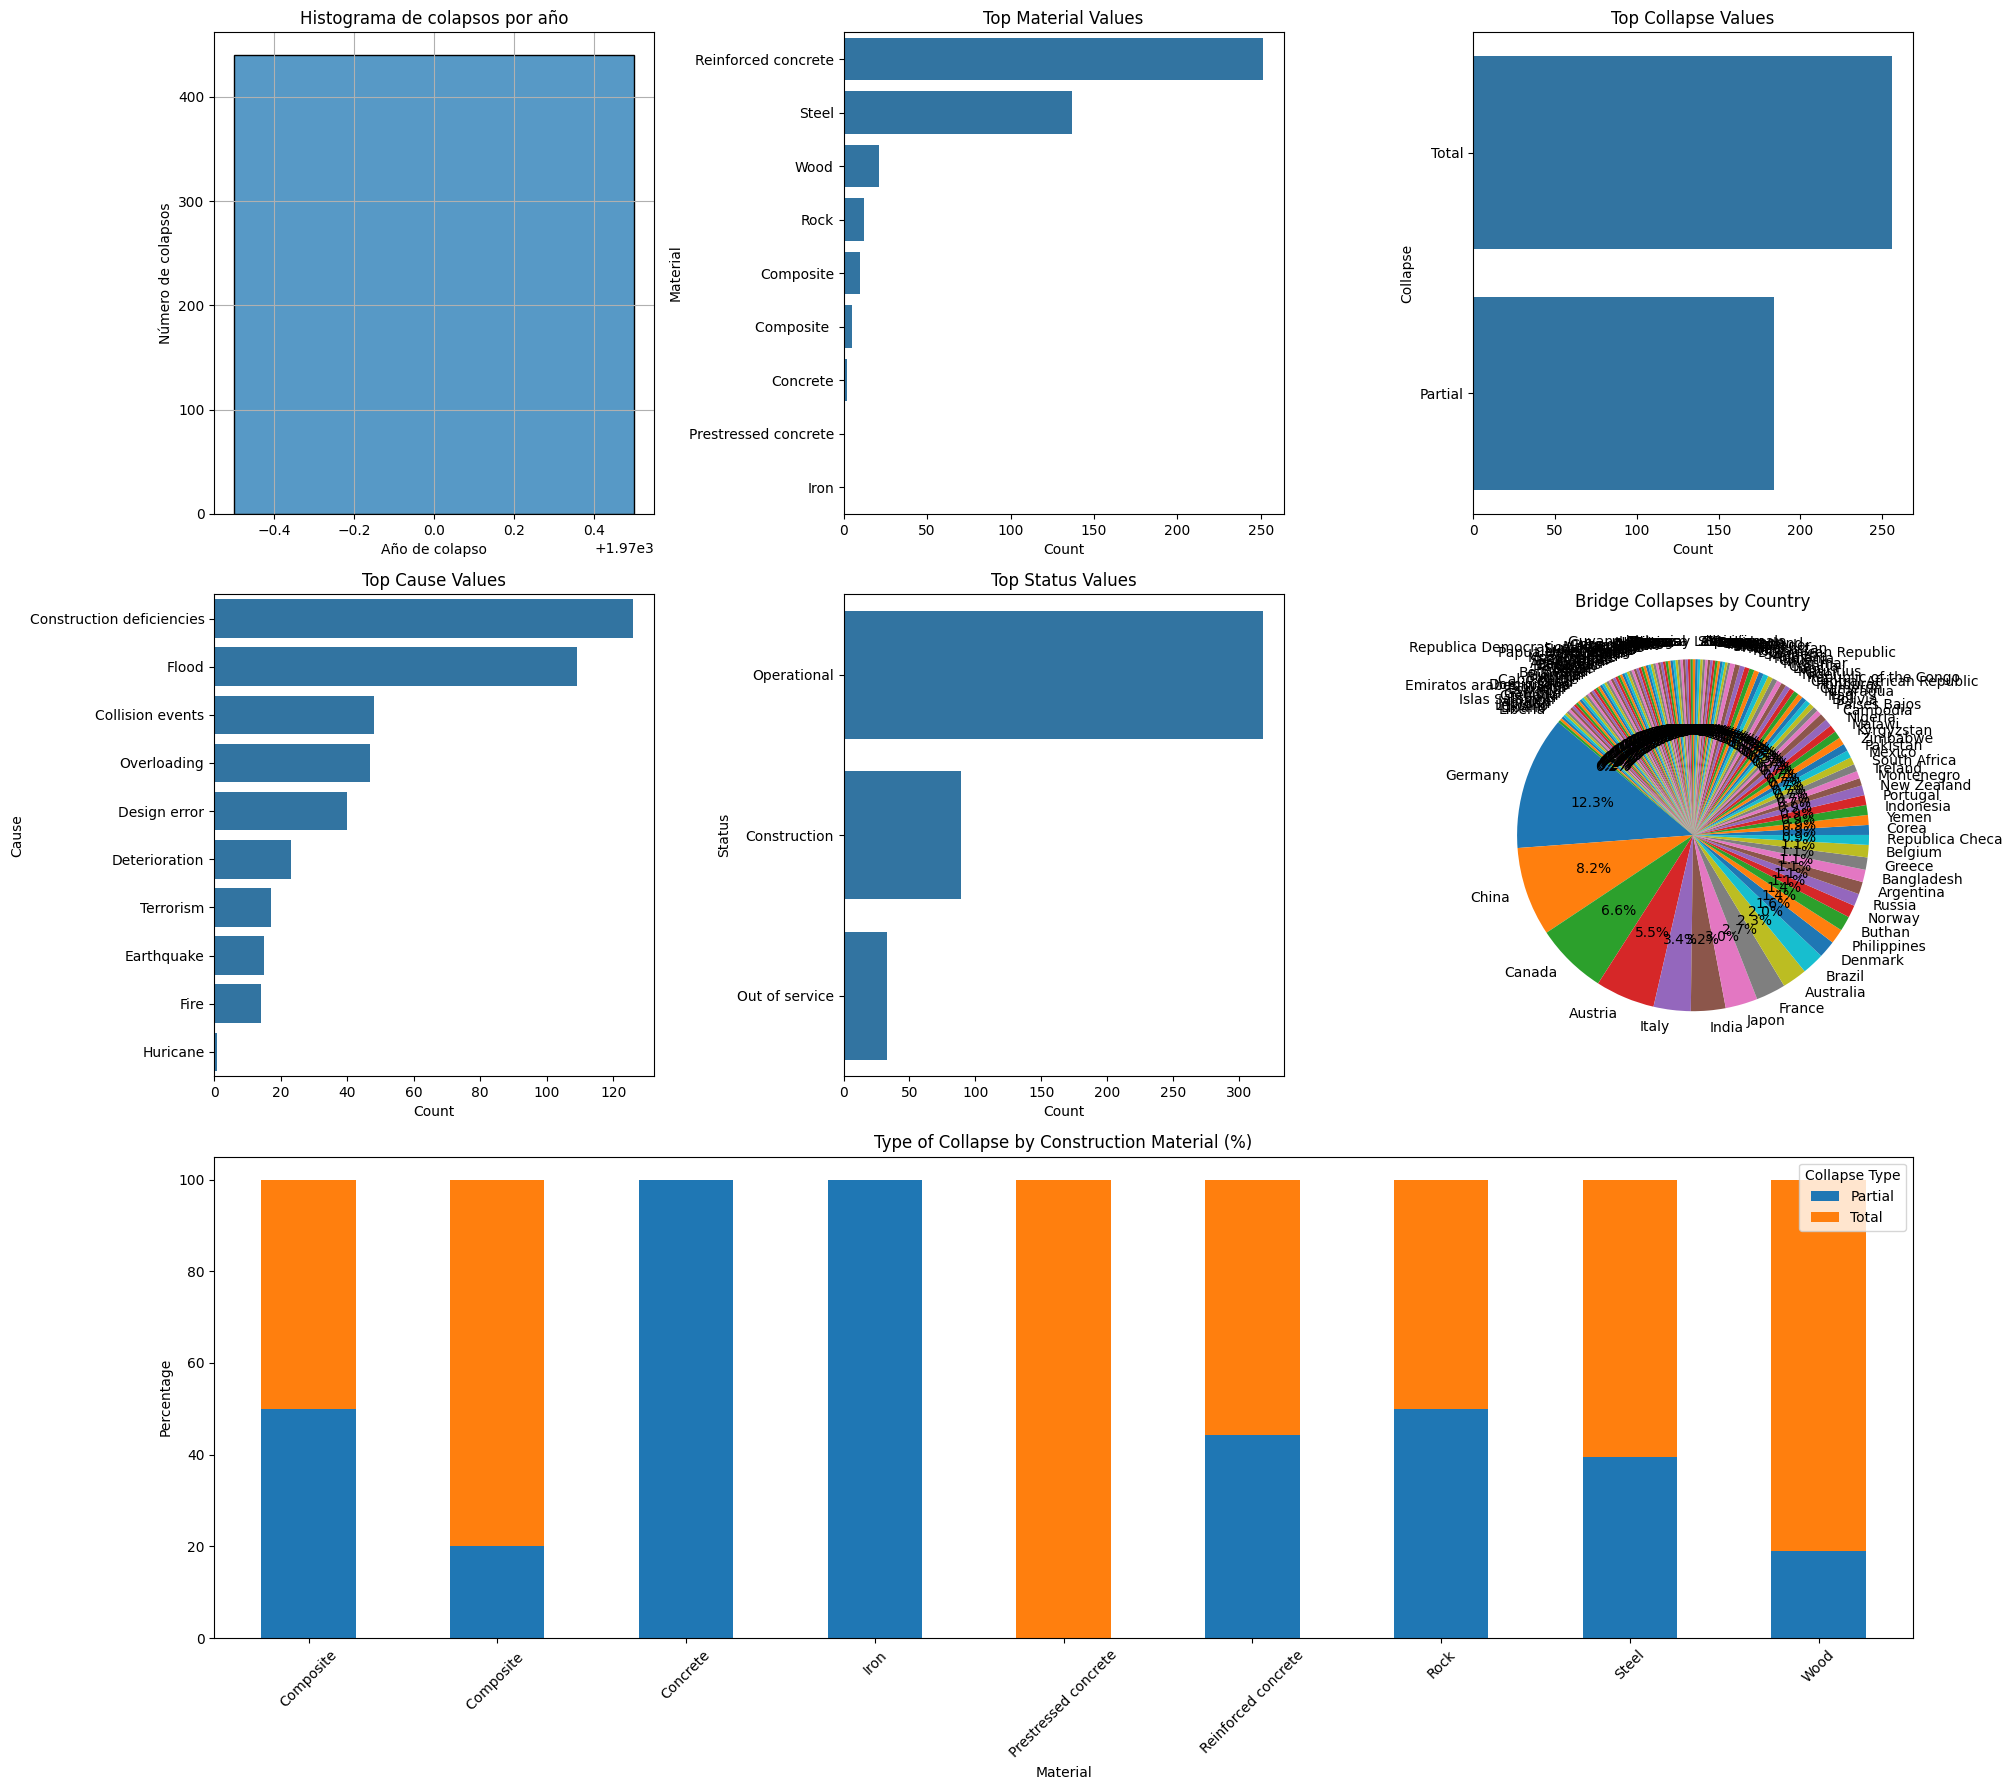

In [ ]:
for cluster in clusters_gaussian_data:
    cluster_analysis_graph(cluster)

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


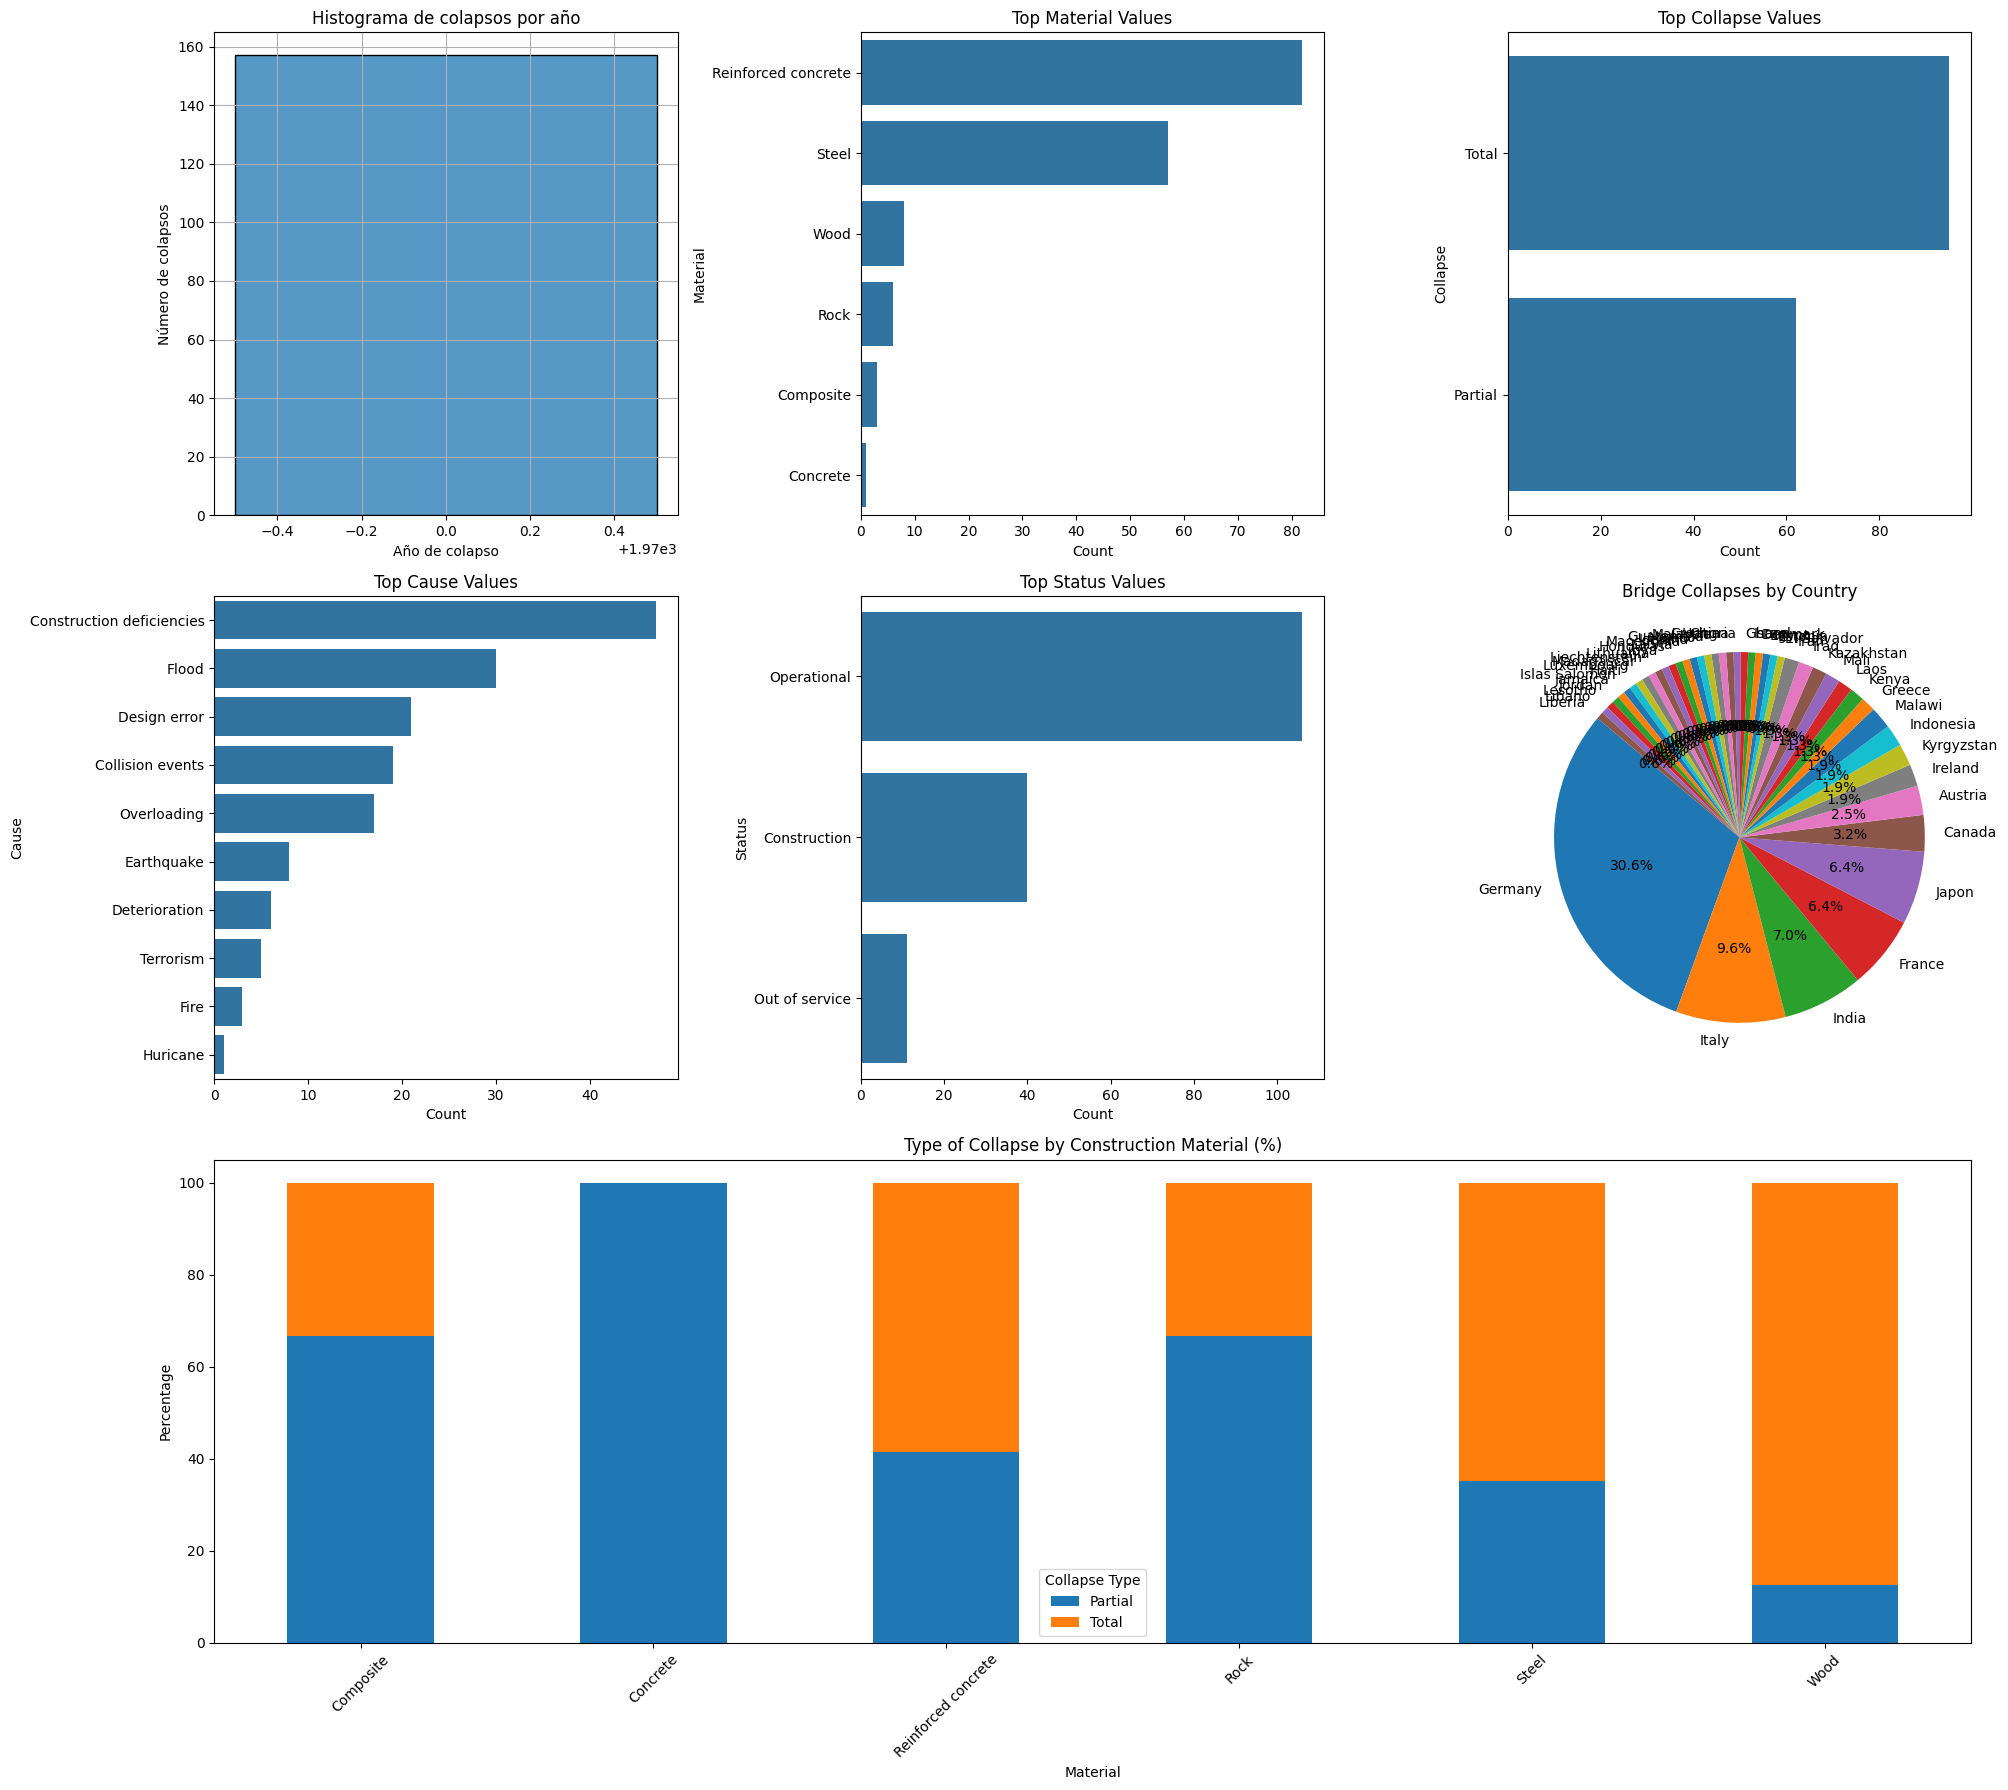

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


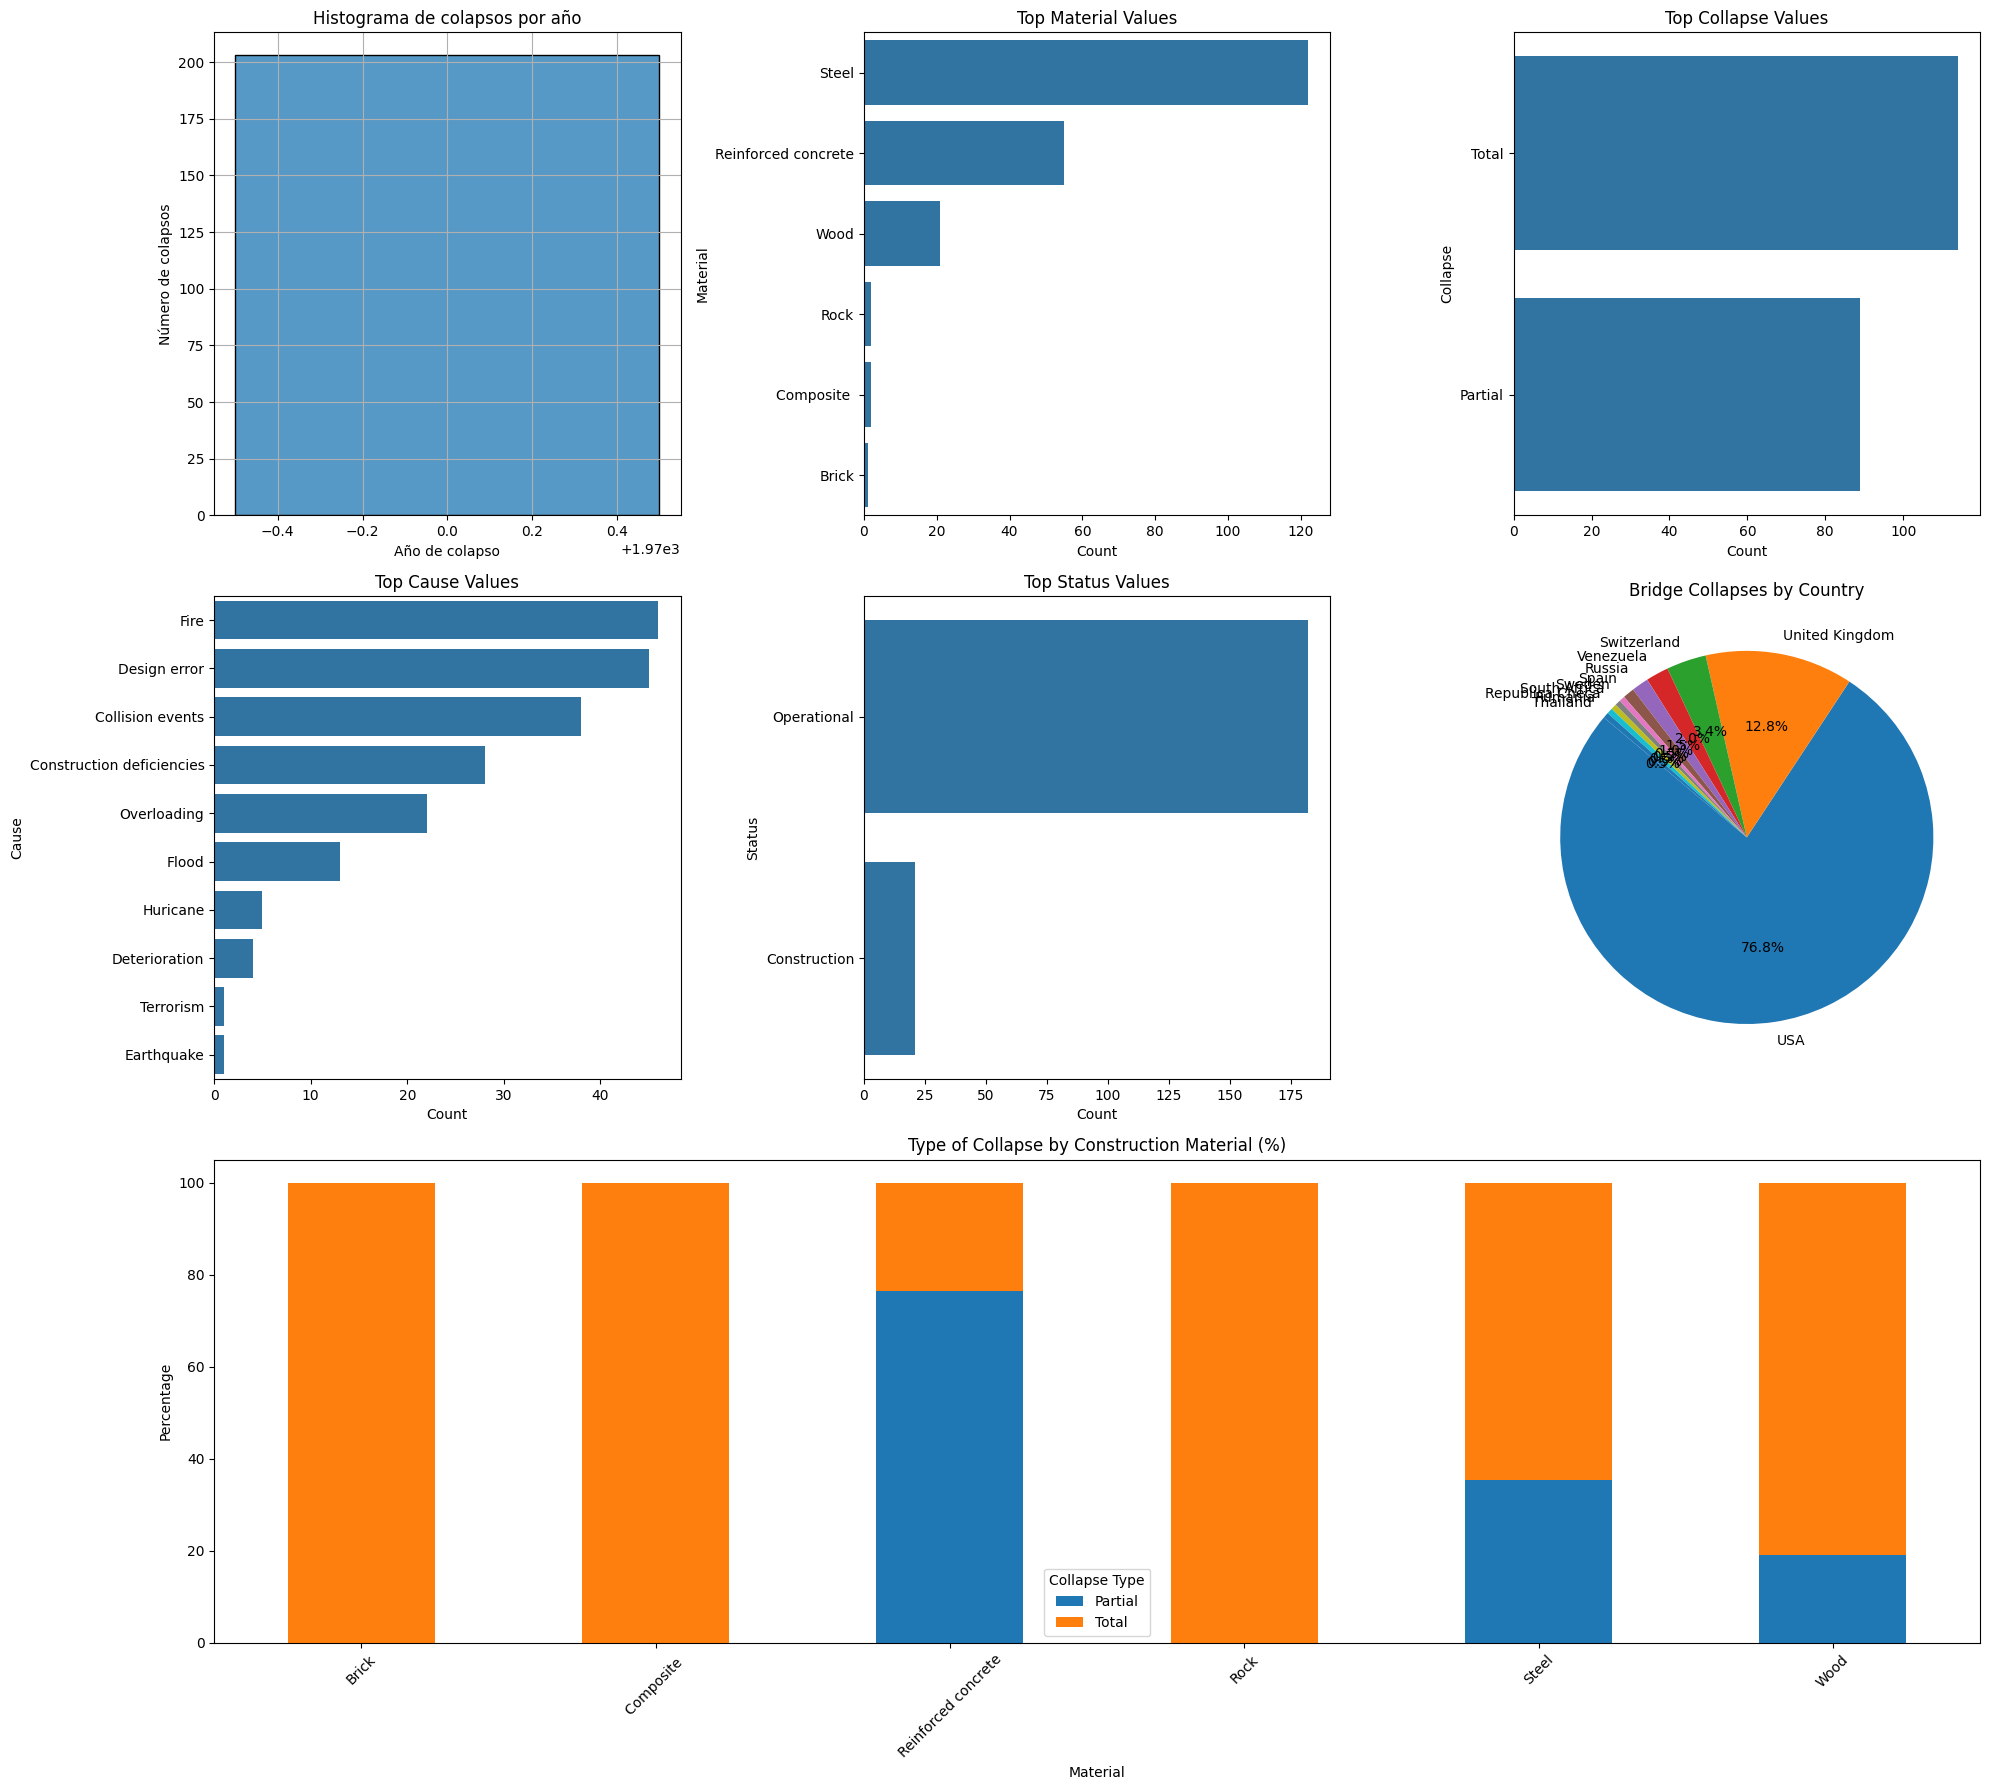

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


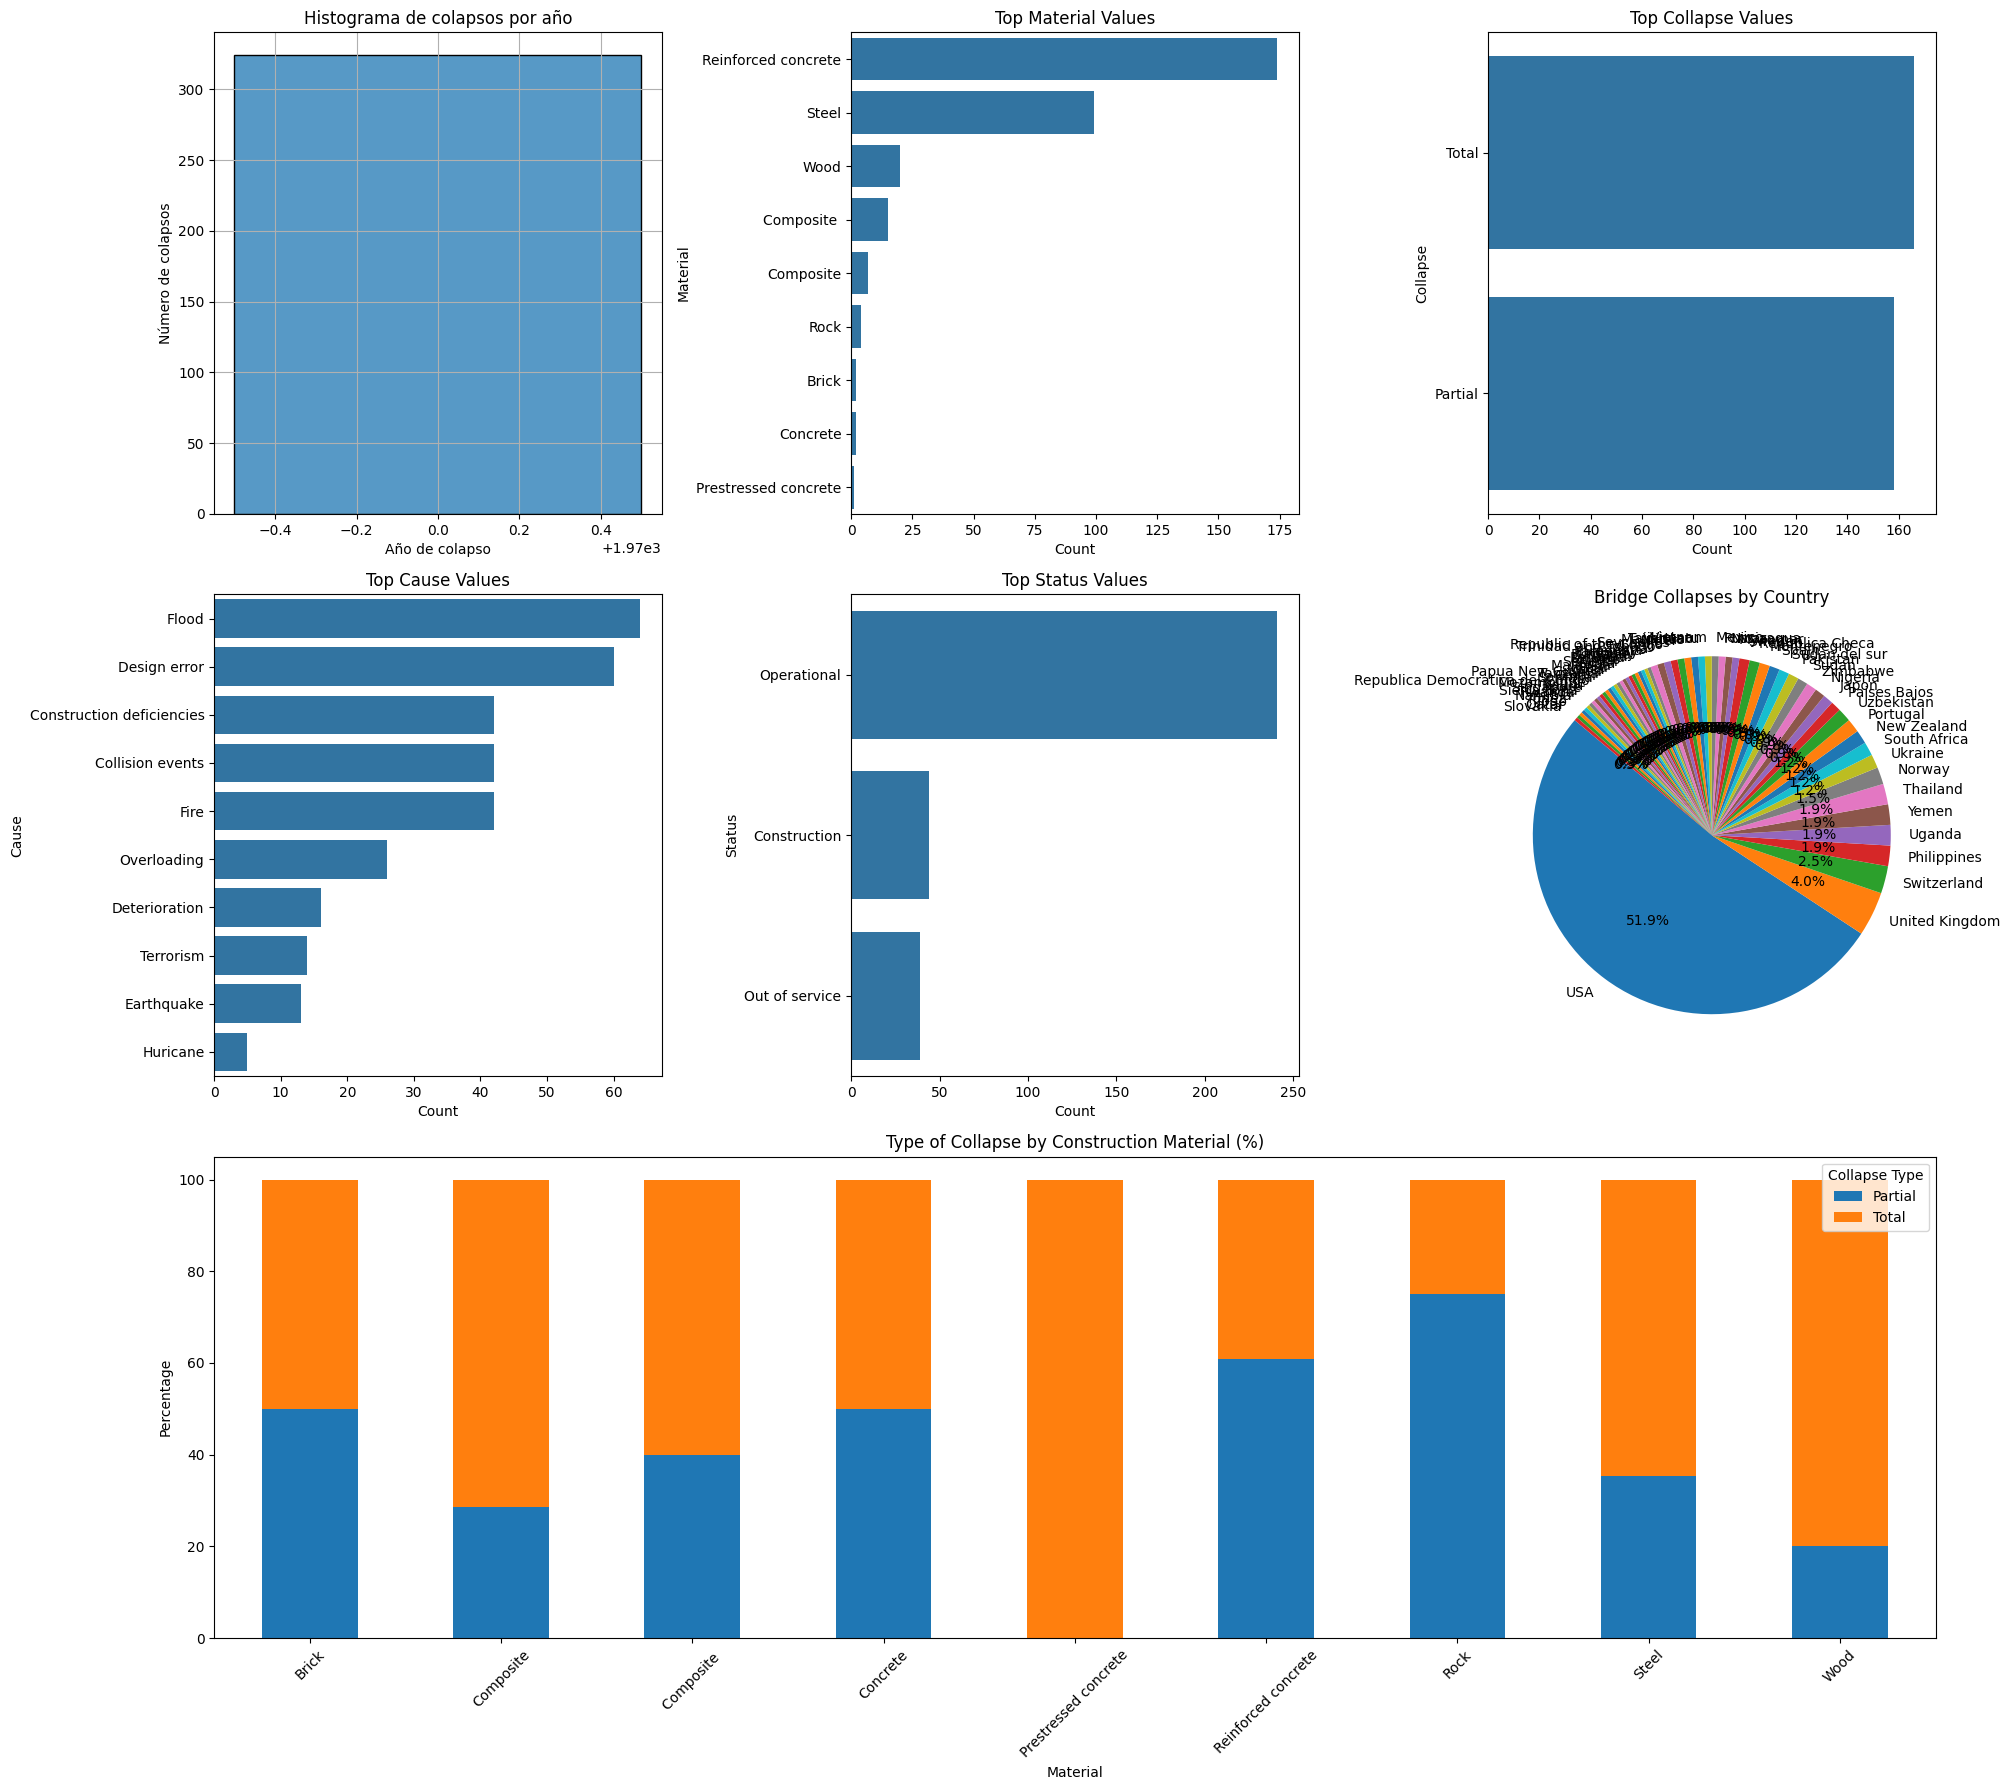

C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
C:\Users\Elias\AppData\Local\Temp\ipykernel_4812\3417945856.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


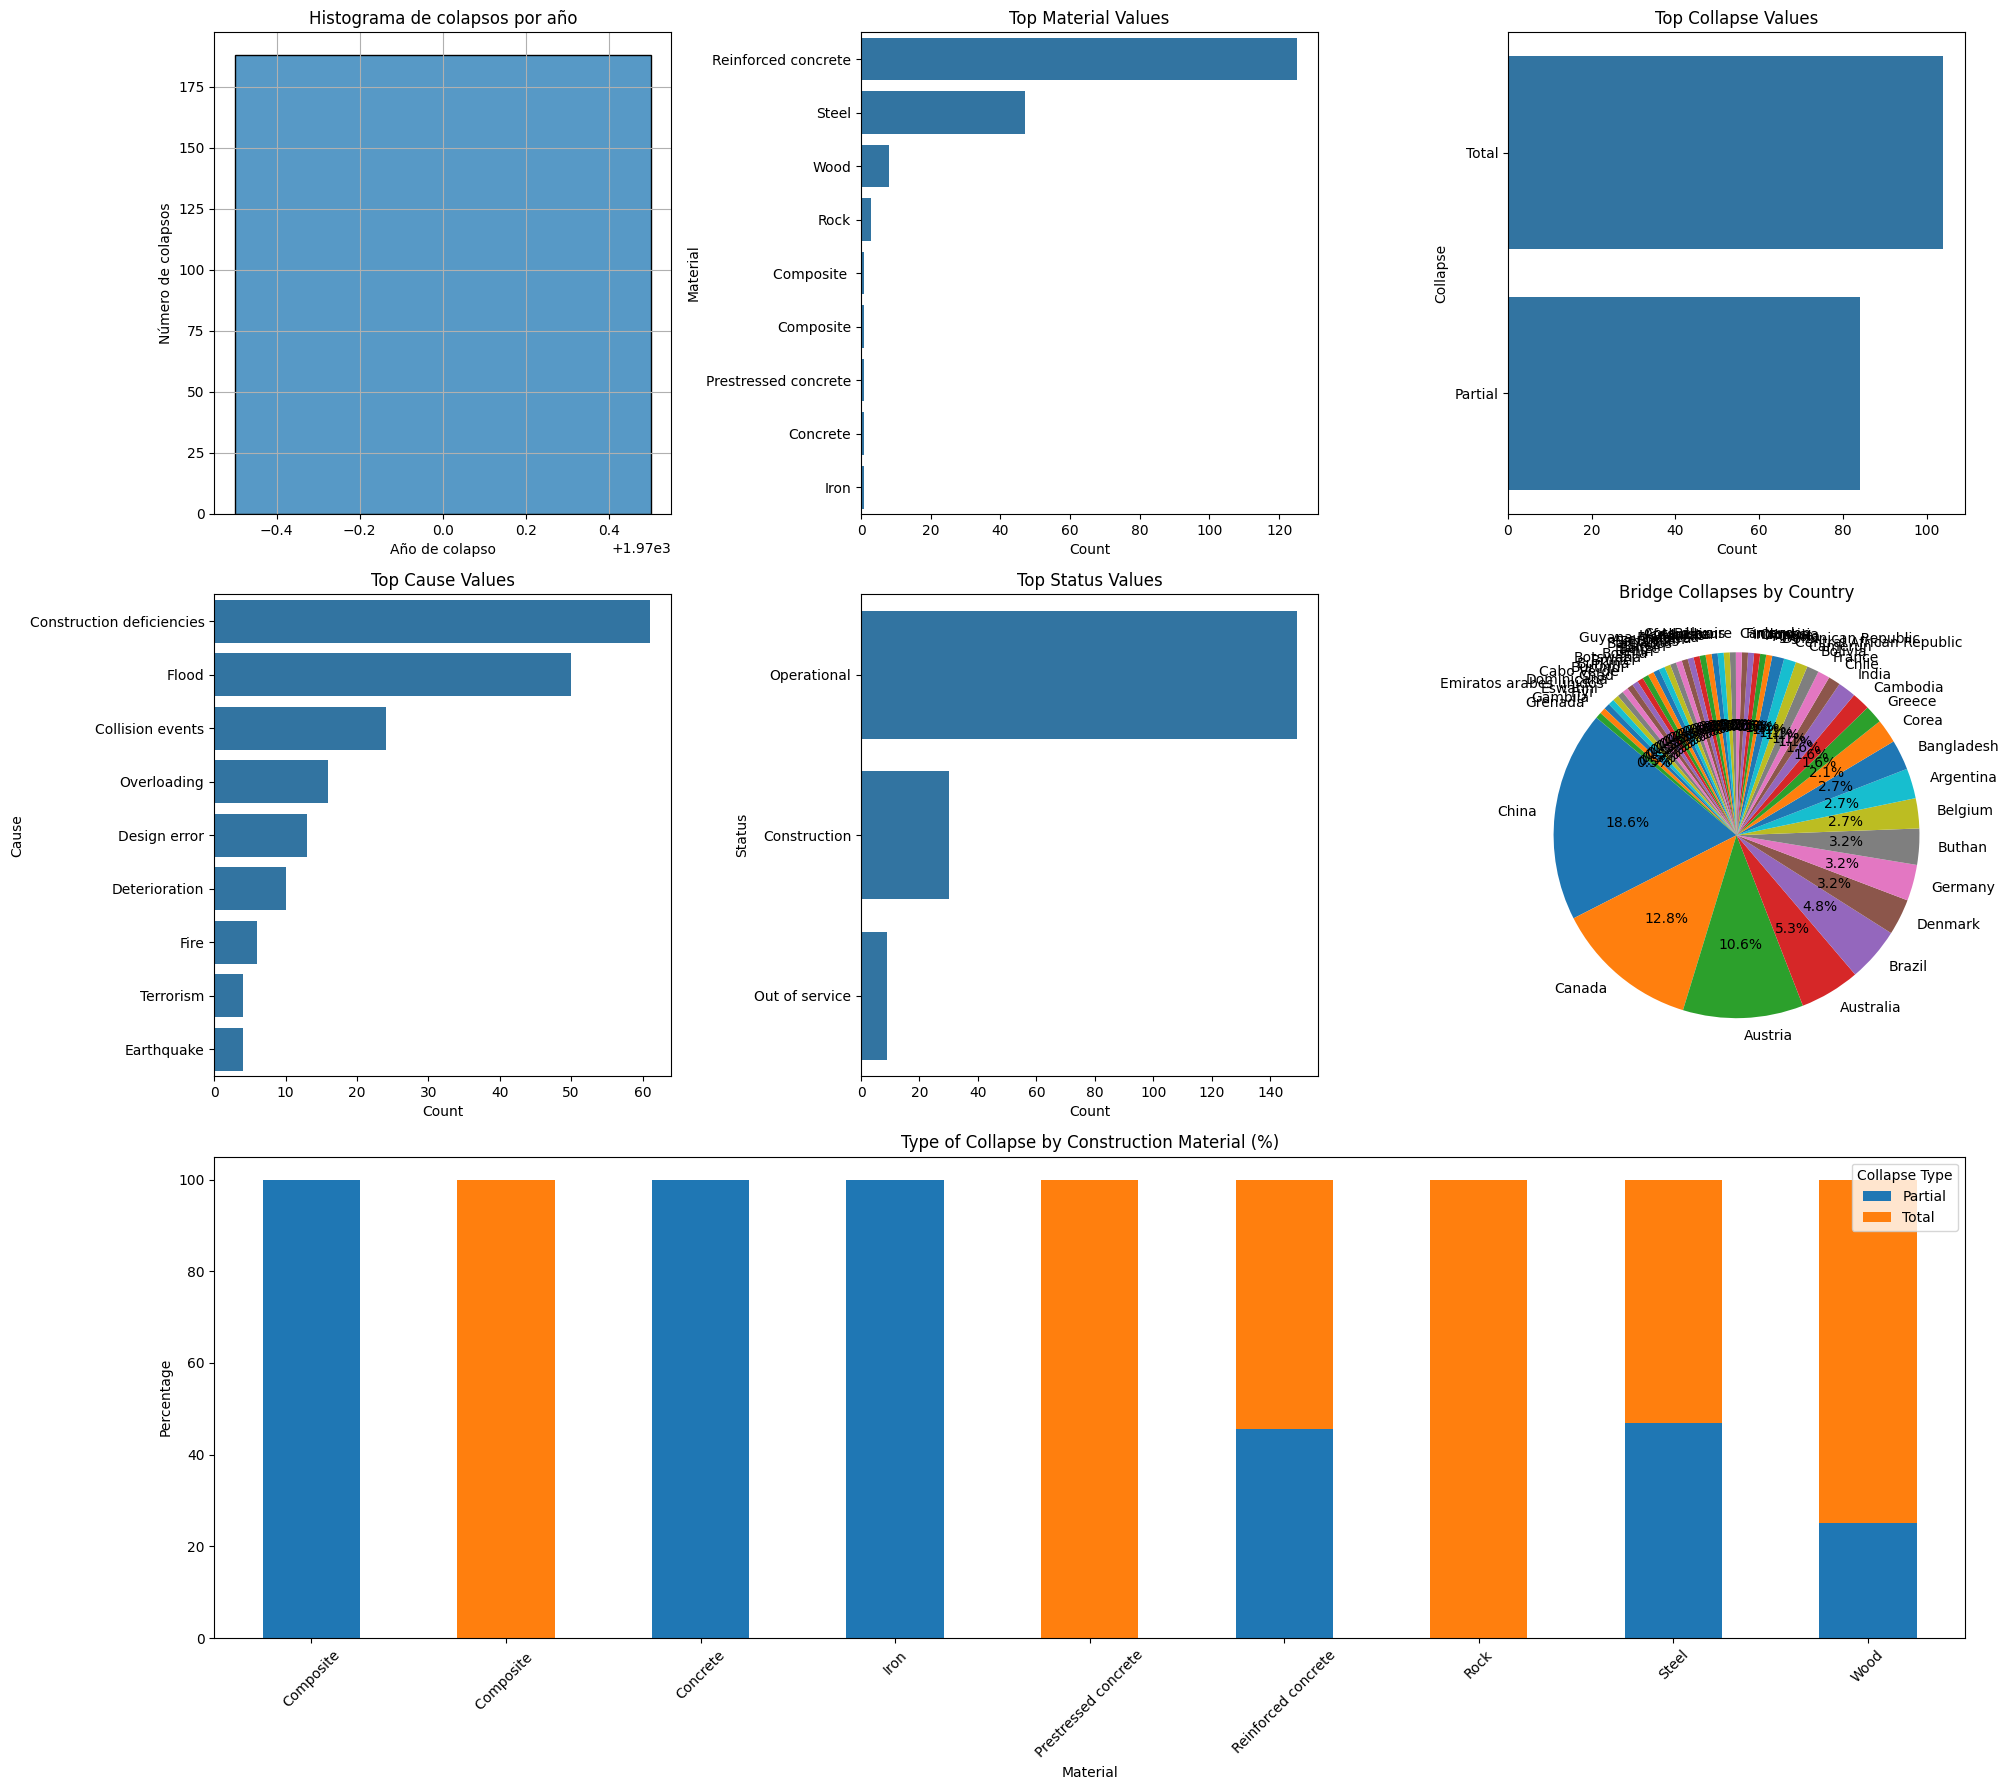

In [ ]:
for cluster in clusters_aglomerative_data:
    cluster_analysis_graph(cluster)